# CO2 - second project

### **French and European CO2 emissions by cars from 2012-2015**


#### After the first project on CO2 for my defense, I felt like there was still a lot to do, because there was data for several more years.


# 1. Cleaning and exploration of data

### The 4 French datasets first: ranging from 20,000 to 55,000 lines per dataset, with 6 important variables: CO2 in g/km, weight of the car, horsepower, and urban, rural and mixed fuel consumption.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the dataframe for FRANCE 2012
df = pd.read_csv('/kaggle/input/co2-emissions/CO data 12-15 original/BASE CL MAJ JUIN 2012.csv', encoding='latin1', sep=';', engine="python")

# Understanding the structure of the dataset
df.head()


lib_mrq lib_mod_doss    lib_mod                                  dscom  \
0  ALFA-ROMEO    GIULIETTA  GIULIETTA        GIULIETTA 1.4 T-jet (120ch) S/S   
1  ALFA-ROMEO         MITO       MITO           MITO 0.9 Twin Air (85ch) S/S   
2  ALFA-ROMEO    GIULIETTA  GIULIETTA        GIULIETTA 1.4 T-jet (120ch) S/S   
3  ALFA-ROMEO         MITO       MITO          MITO 1.4 MPI (105ch) MultiAir   
4  ALFA-ROMEO    GIULIETTA  GIULIETTA  GIULIETTA 1.4 TB MultiAir (170ch) S/S   

              cnit          tvv typ_cbr hybride  puiss_admin_98  puiss_max  \
0  M10ALFVP0000324   940FXF1A05      ES     non               7         85   
1  M10ALFVP0000360  955AXW1B17B      ES     non               4         62   
2  M10ALFVP0001325  940FXF1A05B      ES     non               7         85   
3  M10ALFVP0002035   955AXL1B08      ES     non               6         77   
4  M10ALFVP0002326   940FXG1A06      ES     non               9        120   

   ...     hc    nox hcnox ptcl  masse_ordma_min masse_ordma_max  \
0  ...   0,03  0,026   NaN  NaN             1355            1355   
1  ...  0,049  0,037   NaN  NaN             1205            1205   
2  ...   0,03  0,026   NaN  NaN             1355            1355   
3  ...  0,049   0,04   NaN  NaN             1185            1185   
4  ...  0,048  0,029   NaN  NaN             1365            1365   

                 champ_v9 date_maj Carrosserie       gamme  
0  715/2007*692/2008EURO5      NaN     BERLINE   MOY-SUPER  
1  715/2007*692/2008EURO5      NaN     BERLINE  INFERIEURE  
2  715/2007*692/2008EURO5      NaN     BERLINE   MOY-SUPER  
3  715/2007*692/2008EURO5      NaN     BERLINE  INFERIEURE  
4  715/2007*692/2008EURO5      NaN     BERLINE   MOY-SUPER  

[5 rows x 26 columns]

In [2]:
# cleaning the dataframe
# drop and rename columns
df = df.drop(columns=['typ_cbr', 'lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cnit', 'tvv', 'cod_cbr', 'hybride', 'puiss_admin_98', 'masse_ordma_min', 'typ_boite_nb_rapp', 'co_typ_1', 'hc', 'nox', 'hcnox', 'ptcl', 'champ_v9', 'date_maj', 'Carrosserie', 'gamme', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'], errors='ignore')
df = df.rename(columns={'puiss_max': 'Horsepower in kW', 'co2': 'CO2 in g/km', 'conso_urb': 'Urban consumption in l/100km', 'conso_exurb': 'Rural consumption in l/100km', 'conso_mixte': 'Mixed consumption in l/100km', 'masse_ordma_max': 'Weight in kg'})
df['Year'] = 2012
df.head()

Horsepower in kW Urban consumption in l/100km Rural consumption in l/100km  \
0                85                          8,4                          5,3   
1                62                          4,9                          3,8   
2                85                          8,4                          5,3   
3                77                          7,6                          4,8   
4               120                          7,8                          4,6   

  Mixed consumption in l/100km  CO2 in g/km  Weight in kg  Year  
0                          6,4        149.0          1355  2012  
1                          4,2         98.0          1205  2012  
2                          6,4        149.0          1355  2012  
3                          5,8        136.0          1185  2012  
4                          5,8        134.0          1365  2012

In [3]:
print(df.info())
print(df.describe())
print(df.isna().sum())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40052 entries, 0 to 40051
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Horsepower in kW              40052 non-null  int64  
 1   Urban consumption in l/100km  40020 non-null  object 
 2   Rural consumption in l/100km  40020 non-null  object 
 3   Mixed consumption in l/100km  40022 non-null  object 
 4   CO2 in g/km                   40022 non-null  float64
 5   Weight in kg                  40052 non-null  int64  
 6   Year                          40052 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ MB
None
       Horsepower in kW   CO2 in g/km  Weight in kg     Year
count      40052.000000  40022.000000  40052.000000  40052.0
mean         122.643339    204.008920   2212.432962   2012.0
std           45.563309     36.249836    389.339797      0.0
min           10.000000     27.000000    825.00000

In [4]:
# transform objects into float
df['Urban consumption in l/100km'] = df['Urban consumption in l/100km'].replace(',', '.', regex=True).astype(float)
df['Mixed consumption in l/100km'] = df['Mixed consumption in l/100km'].replace(',', '.', regex=True).astype(float)
df['Rural consumption in l/100km'] = df['Rural consumption in l/100km'].replace(',', '.', regex=True).astype(float)

# fill in missing values
df['Urban consumption in l/100km'] = df['Urban consumption in l/100km'].fillna(df['Urban consumption in l/100km'].median())
df['Rural consumption in l/100km'] = df['Rural consumption in l/100km'].fillna(df['Rural consumption in l/100km'].median())
df['Mixed consumption in l/100km'] = df['Mixed consumption in l/100km'].fillna(df['Mixed consumption in l/100km'].median())
df['CO2 in g/km'] = df['CO2 in g/km'].fillna(df['CO2 in g/km'].median())

In [5]:
# Save DataFrame to a CSV file
df.to_csv('/kaggle/working/clean_data_France_2012.csv', index=False)

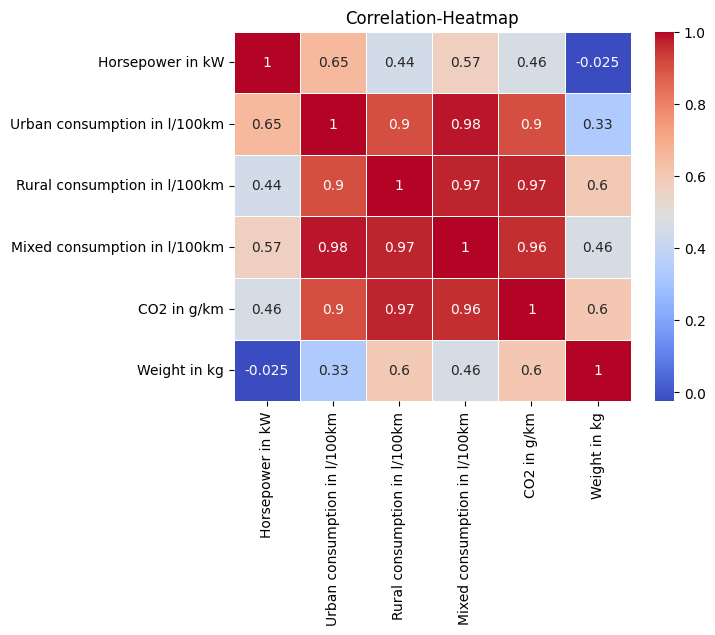

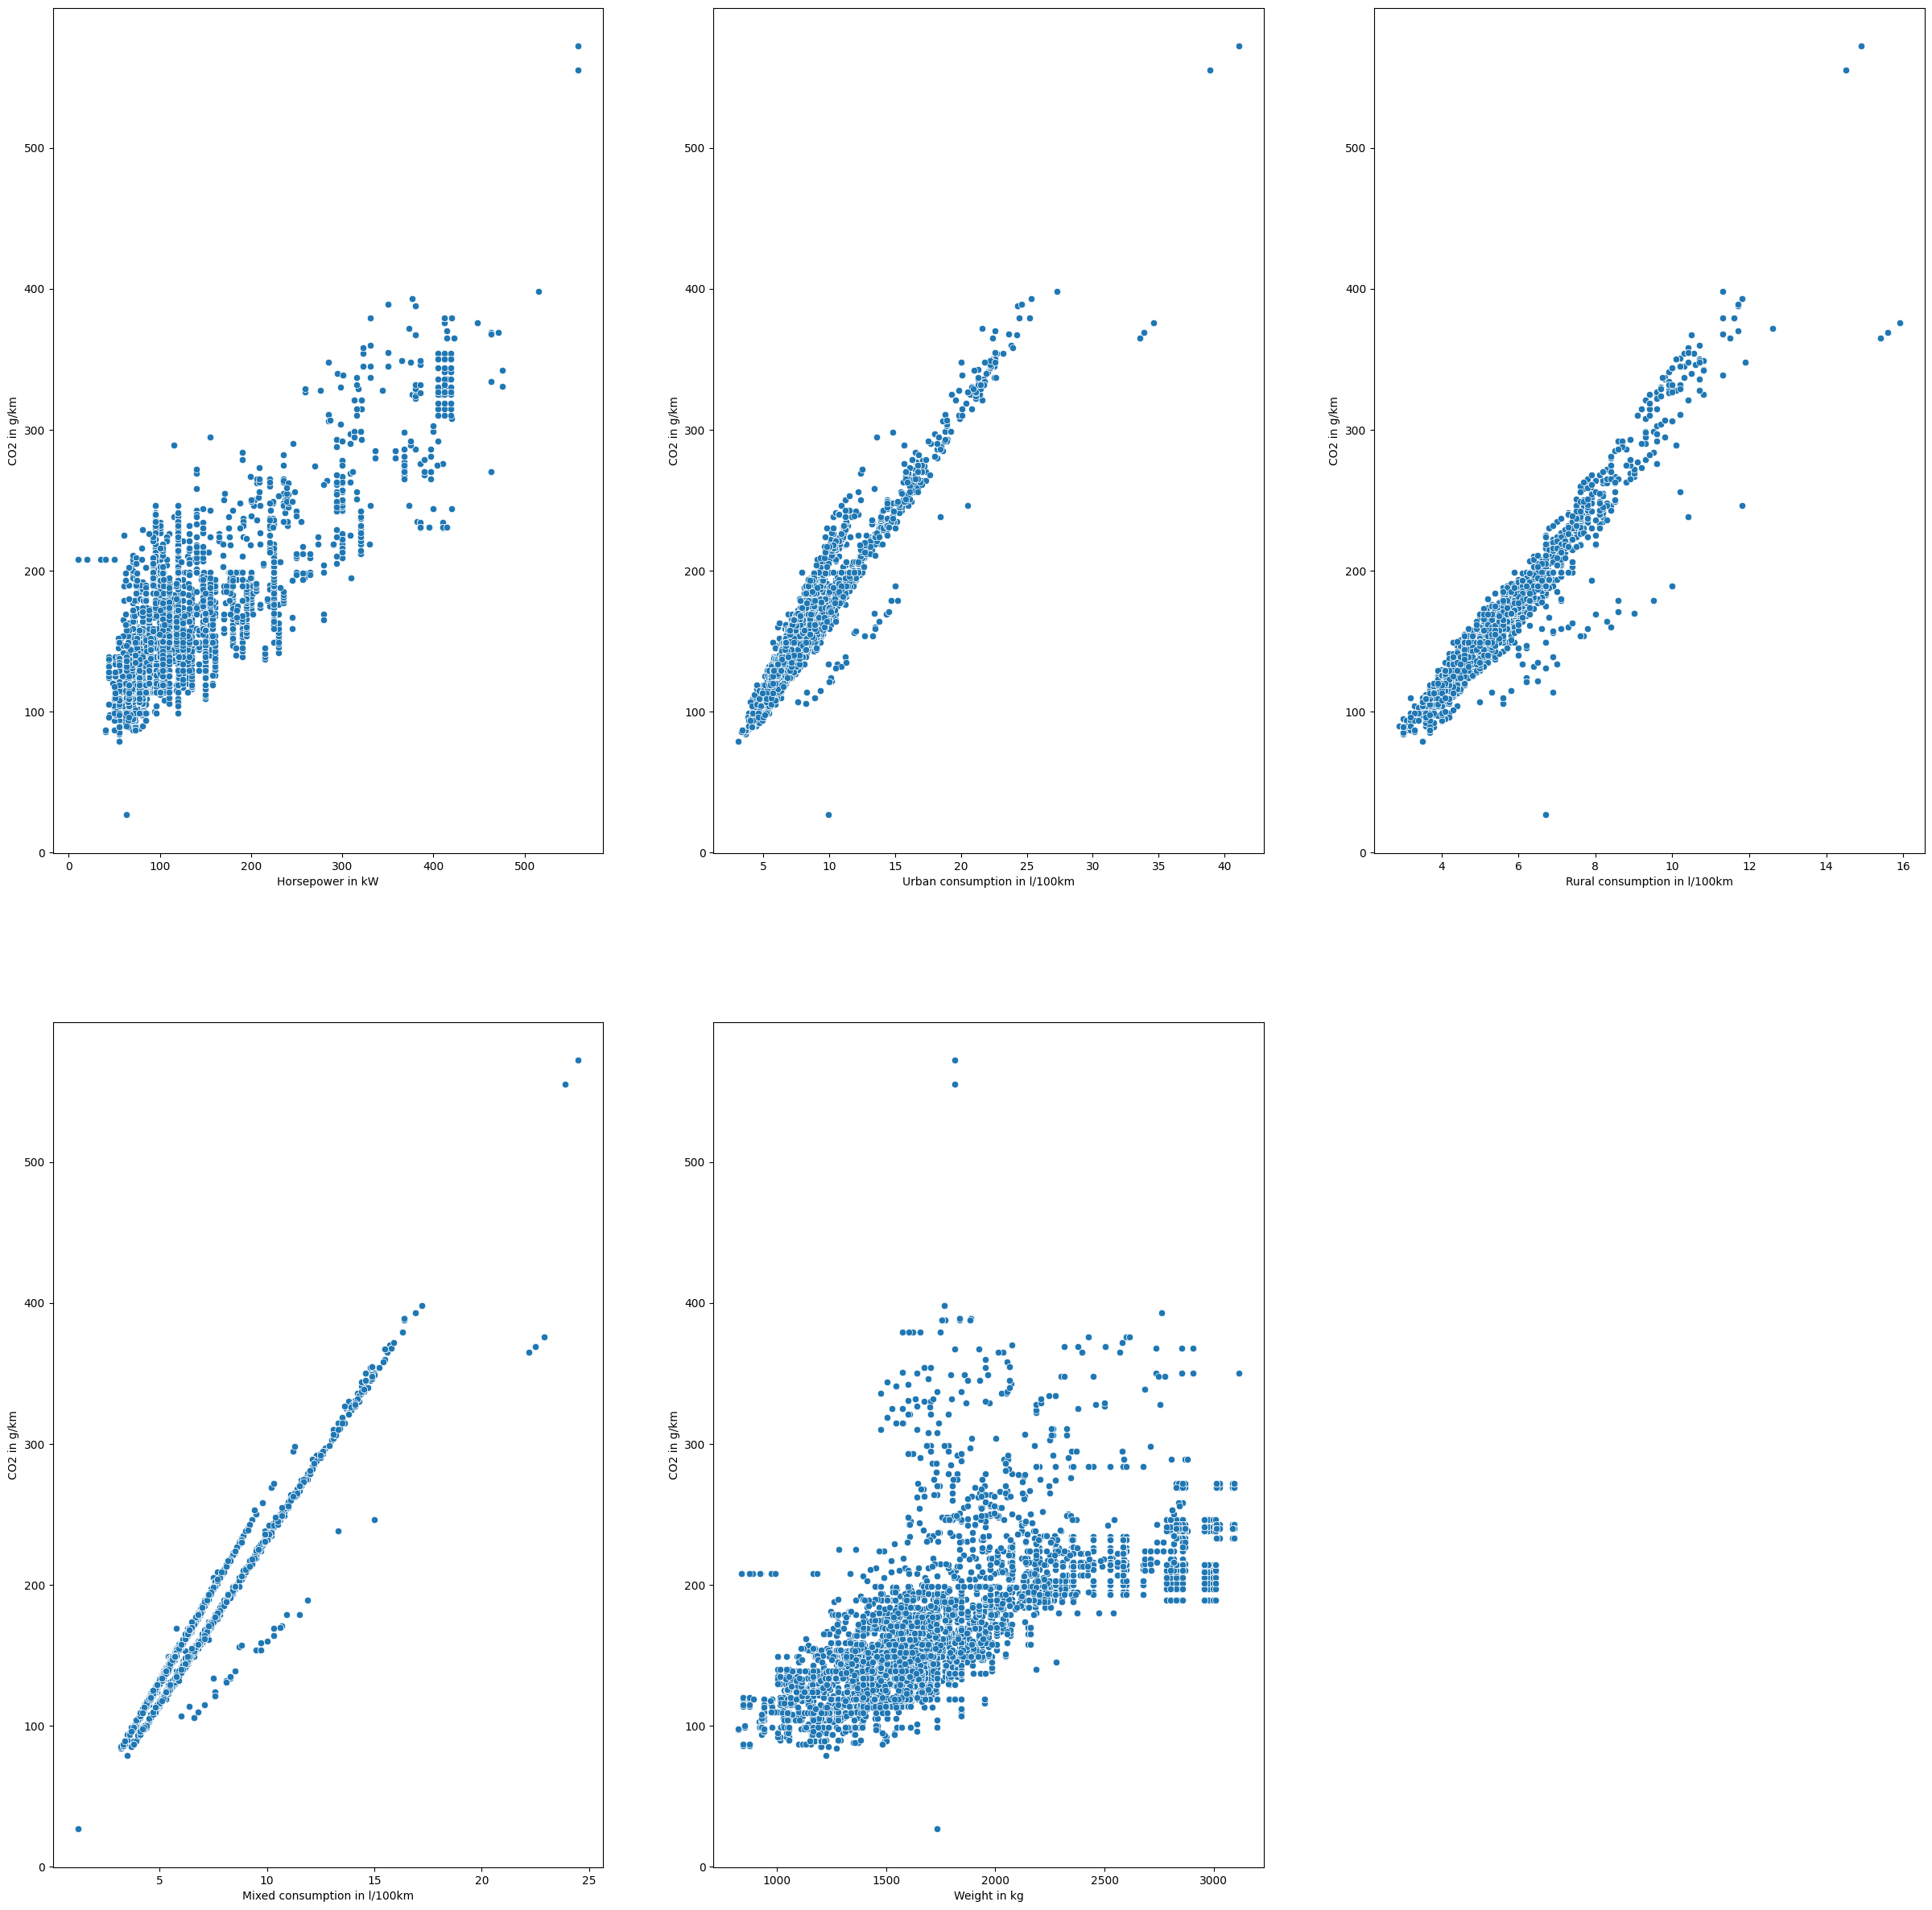

In [6]:
# select numeric columns for correlation
df_num = df.select_dtypes(include=[int, float])
df_num = df_num.drop('Year', axis=1)
cor = df_num.corr()

# display heatmap of correlation for the numeric columns
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation-Heatmap')
plt.show()

i = 1
plt.figure(figsize=(30,30))
for column in df_num:
    if (column != 'CO2 in g/km') & (column != 'Year')  :
        plt.subplot(2,3,i)
        sns.scatterplot(x=column, y='CO2 in g/km', data=df_num)
        i += 1

In [7]:
# import the dataframe for FRANCE 2013
df = pd.read_csv('/kaggle/input/co2-emissions/CO data 12-15 original/cl_JUIN_2013-complet3.csv', encoding='latin1', sep=';', engine="python")

# Understanding the structure of the dataset
df.head()

Marque Modèle dossier Modèle UTAC   Désignation commerciale  \
0  ALFA-ROMEO            159         159      159 1750 Tbi (200ch)   
1  ALFA-ROMEO            159         159  159 2.0 JTDm (170ch) ECO   
2  ALFA-ROMEO            159         159      159 2.0 JTDm (136ch)   
3  ALFA-ROMEO            159         159      159 2.0 JTDm (136ch)   
4  ALFA-ROMEO            159         159      159 2.0 JTDm (170ch)   

              CNIT Type Variante Version (TVV) Carburant Hybride  \
0  M10ALFVP000G340                 939AXN1B52C        ES     non   
1  M10ALFVP000U221                 939AXP1B54C        GO     non   
2  M10ALFVP000E302                  939AXR1B64        GO     non   
3  M10ALFVP000F303                 939AXR1B64B        GO     non   
4  M10ALFVP000G304                  939AXS1B66        GO     non   

   Puissance administrative  Puissance maximale (kW)  ... HC (g/km)  \
0                        12                    147.0  ...     0.052   
1                         9                    125.0  ...       NaN   
2                         7                    100.0  ...       NaN   
3                         7                    100.0  ...       NaN   
4                         9                    125.0  ...       NaN   

   NOX (g/km)  HC+NOX (g/km)  Particules (g/km)  masse vide euro min (kg)  \
0       0.032            NaN              0.002                      1505   
1       0.169          0.190              0.003                      1565   
2       0.149          0.175              0.001                      1565   
3       0.149          0.175              0.001                      1565   
4       0.164          0.193              0.001                      1565   

   masse vide euro max (kg)                Champ V9  Date de mise à jour  \
0                      1505  715/2007*692/2008EURO5              juin-13   
1                      1565  715/2007*692/2008EURO5              juin-13   
2                      1565  715/2007*692/2008EURO5              juin-13   
3                      1565  715/2007*692/2008EURO5              juin-13   
4                      1565  715/2007*692/2008EURO5              juin-13   

   Carrosserie      gamme  
0        BREAK  MOY-SUPER  
1      BERLINE  MOY-SUPER  
2      BERLINE  MOY-SUPER  
3      BERLINE  MOY-SUPER  
4      BERLINE  MOY-SUPER  

[5 rows x 26 columns]

In [8]:
# cleaning the dataframe
# drop and rename columns
df = df.drop(columns=['typ_cbr', 'Marque', 'Modèle dossier', 'Modèle UTAC', 'Désignation commerciale', 'CNIT', 'Type Variante Version (TVV)', 'Carburant', 'Hybride', 'Puissance administrative', 'masse vide euro min (kg)', 'typ_boite_nb_rapp', 'co_typ_1', 'HC (g/km)', 'NOX (g/km)', 'HC+NOX (g/km)', 'Particules (g/km)', 'Champ V9', 'Date de mise à jour', 'Carrosserie', 'gamme', 'Boîte de vitesse', 'CO type I (g/km)', 'Unnamed: 28', 'Unnamed: 29'], errors='ignore')
df = df.rename(columns={'Puissance maximale (kW)': 'Horsepower in kW', 'CO2 (g/km)': 'CO2 in g/km', 'Consommation urbaine (l/100km)': 'Urban consumption in l/100km', 'Consommation extra-urbaine (l/100km)': 'Rural consumption in l/100km', 'Consommation mixte (l/100km)': 'Mixed consumption in l/100km', 'masse vide euro max (kg)': 'Weight in kg'})
df['Year'] = 2013
df.head()

Horsepower in kW  Urban consumption in l/100km  \
0             147.0                          11.3   
1             125.0                           6.6   
2             100.0                           6.6   
3             100.0                           6.6   
4             125.0                           6.9   

   Rural consumption in l/100km  Mixed consumption in l/100km  CO2 in g/km  \
0                           5.8                           7.8        182.0   
1                           4.3                           5.1        136.0   
2                           4.2                           5.1        134.0   
3                           4.2                           5.1        134.0   
4                           4.3                           5.3        139.0   

   Weight in kg  Year  
0          1505  2013  
1          1565  2013  
2          1565  2013  
3          1565  2013  
4          1565  2013

In [9]:
print(df.info())
print(df.describe())
print(df.isna().sum())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44850 entries, 0 to 44849
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Horsepower in kW              44850 non-null  float64
 1   Urban consumption in l/100km  44808 non-null  float64
 2   Rural consumption in l/100km  44808 non-null  float64
 3   Mixed consumption in l/100km  44811 non-null  float64
 4   CO2 in g/km                   44811 non-null  float64
 5   Weight in kg                  44850 non-null  int64  
 6   Year                          44850 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 2.4 MB
None
       Horsepower in kW  Urban consumption in l/100km  \
count      44850.000000                  44808.000000   
mean         124.780834                      9.706744   
std           49.158804                      2.366181   
min           10.000000                      0.000000   
25%          100.0000

In [10]:
# fill in missing values
df['Urban consumption in l/100km'] = df['Urban consumption in l/100km'].fillna(df['Urban consumption in l/100km'].median())
df['Rural consumption in l/100km'] = df['Rural consumption in l/100km'].fillna(df['Rural consumption in l/100km'].median())
df['Mixed consumption in l/100km'] = df['Mixed consumption in l/100km'].fillna(df['Mixed consumption in l/100km'].median())
df['CO2 in g/km'] = df['CO2 in g/km'].fillna(df['CO2 in g/km'].median())

In [11]:
# Save DataFrame to a CSV file
df.to_csv('/kaggle/working/clean_data_France_2013.csv', index=False)

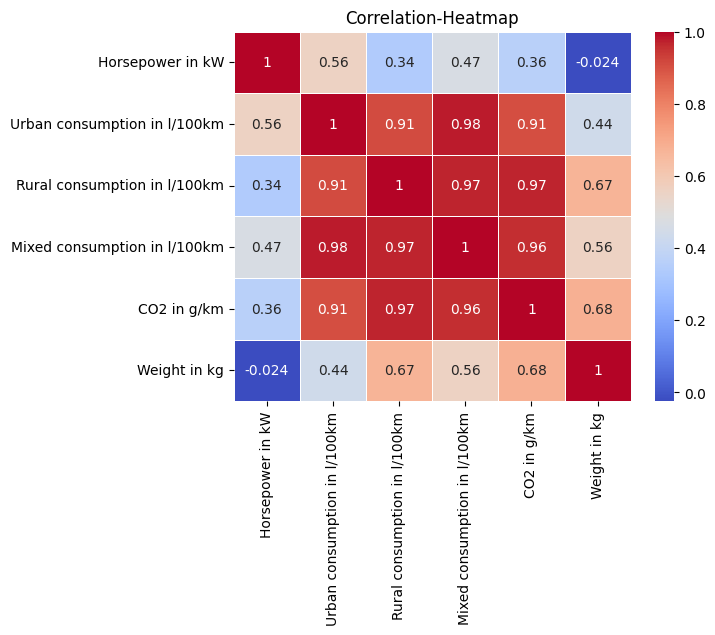

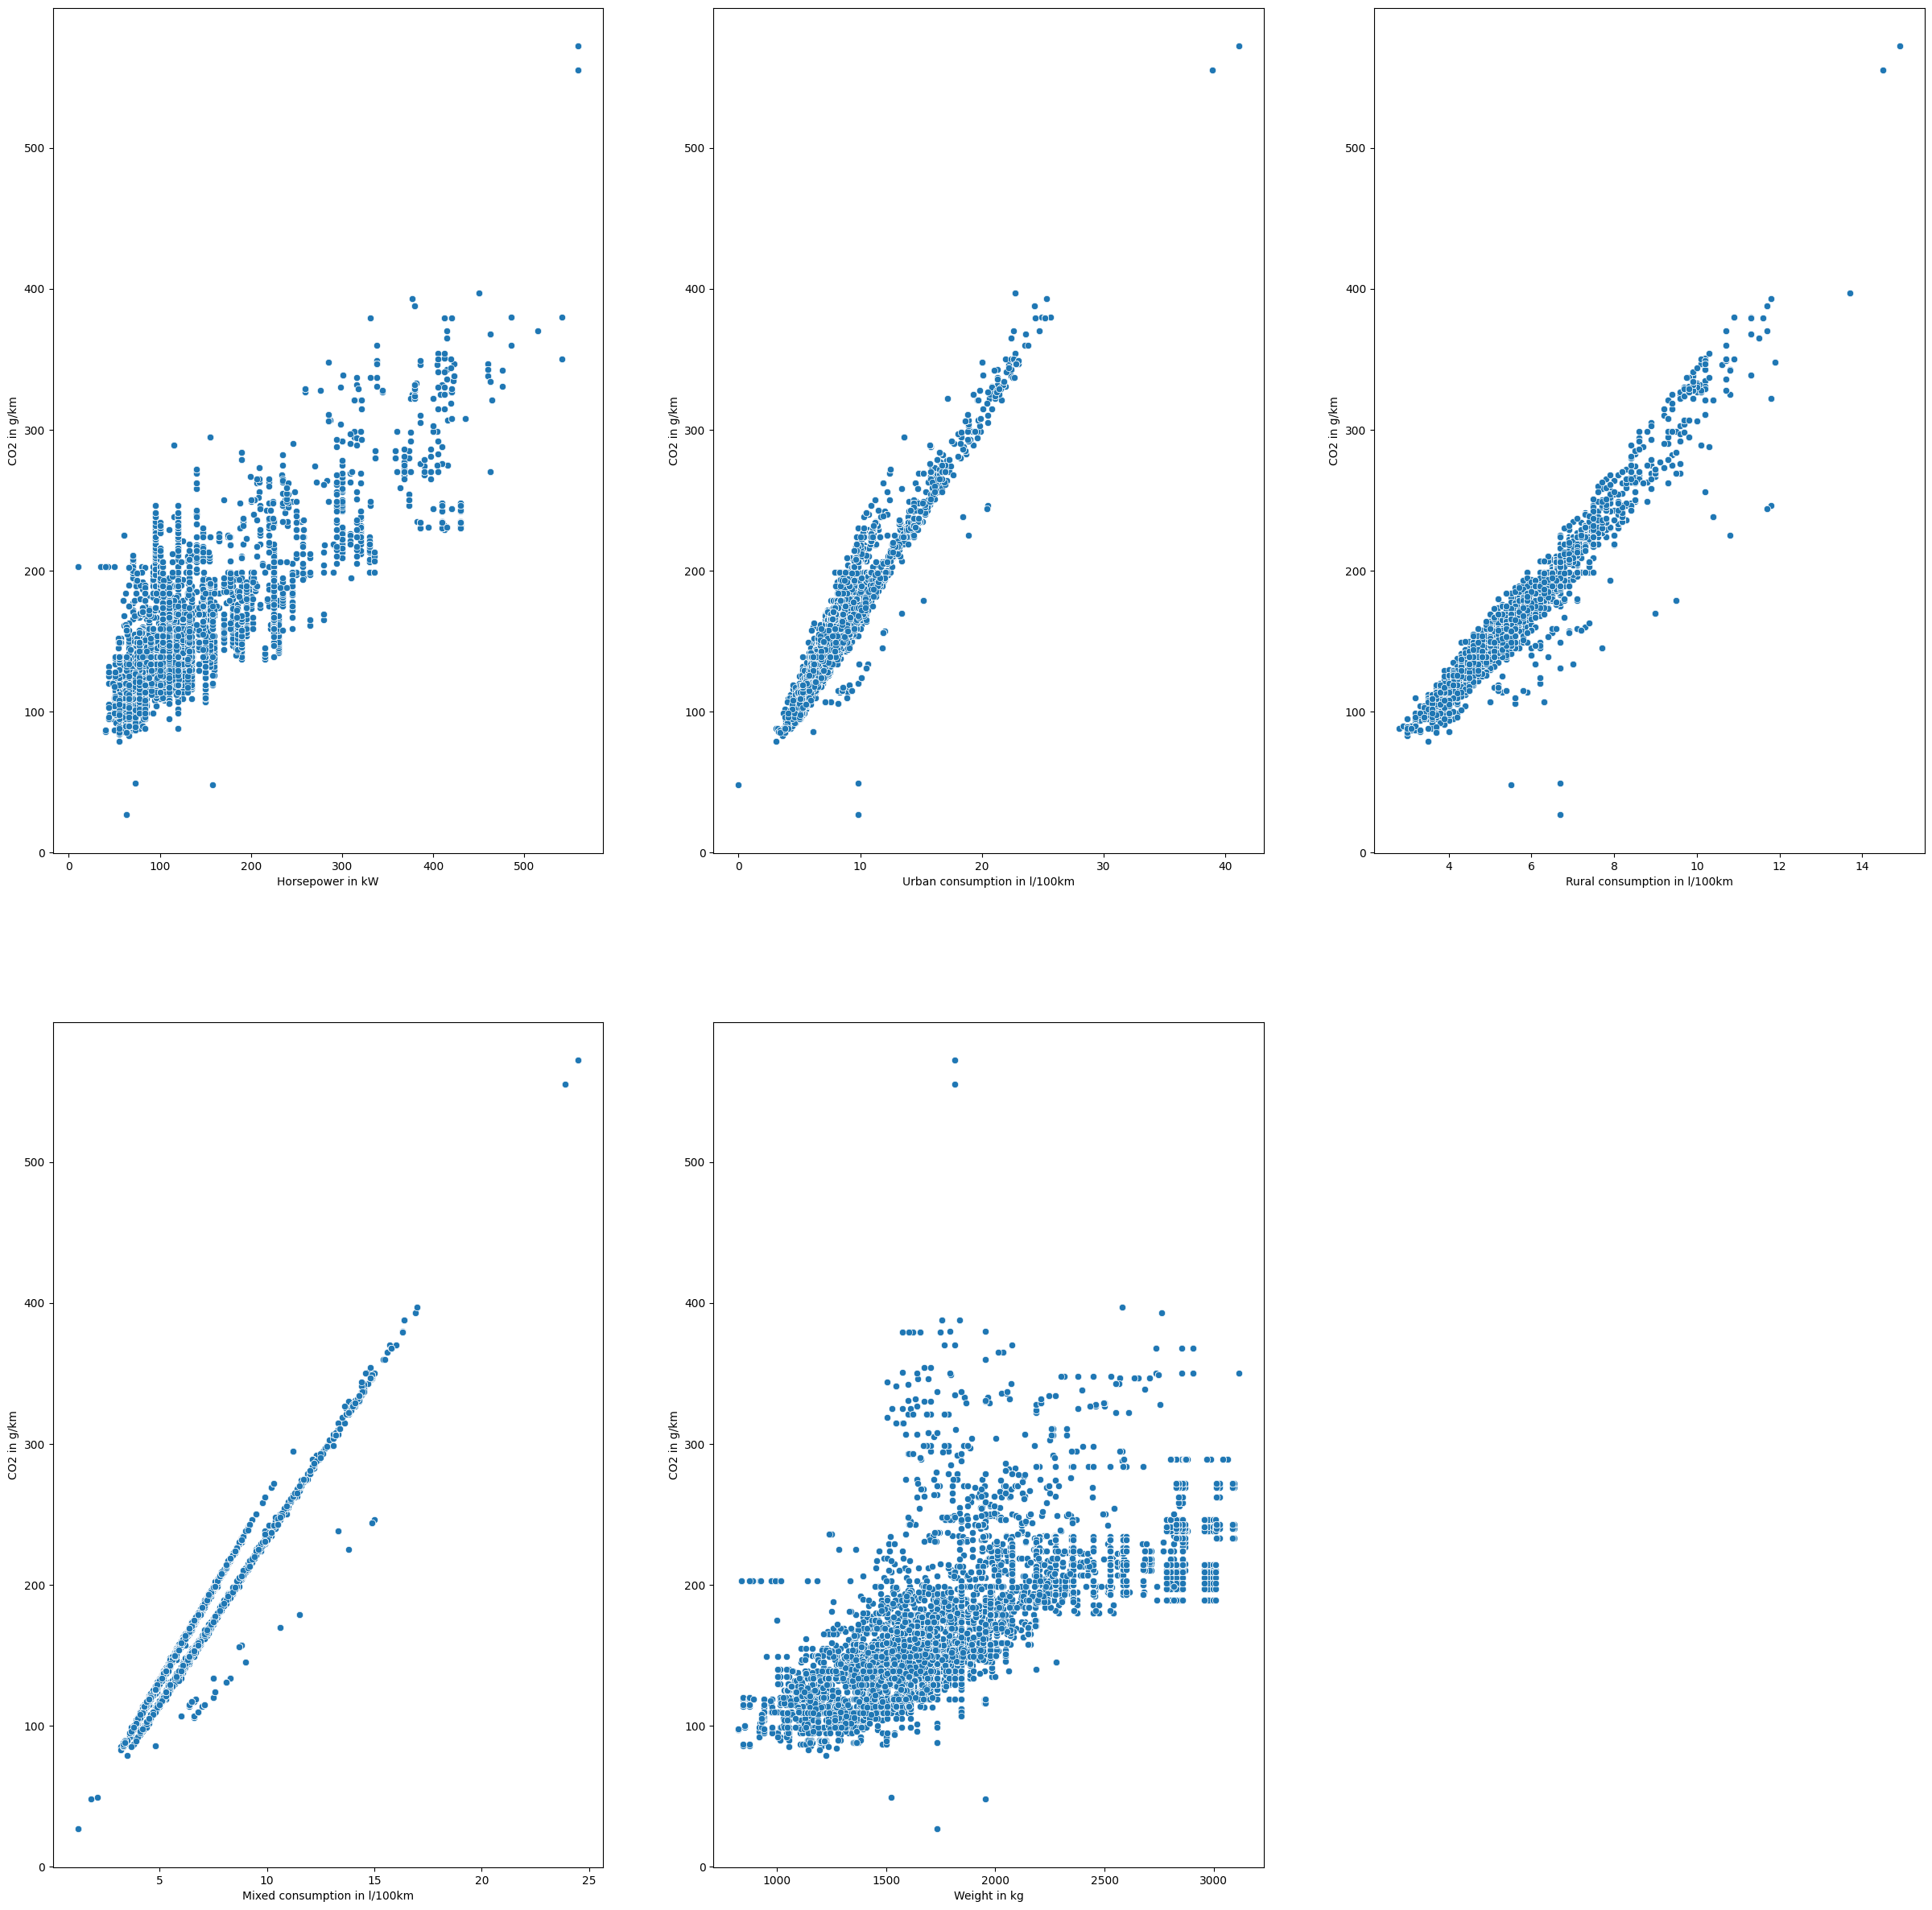

In [12]:
# select numeric columns for correlation
df_num = df.select_dtypes(include=[int, float])
df_num = df_num.drop('Year', axis=1)
cor = df_num.corr()

# display heatmap of correlation for the numeric columns
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation-Heatmap')
plt.show()

i = 1
plt.figure(figsize=(30,30))
for column in df_num:
    if (column != 'CO2 in g/km') & (column != 'Year'):
        plt.subplot(2,3,i)
        sns.scatterplot(x=column, y='CO2 in g/km', data=df_num)
        i += 1

In [13]:
# import the dataframe for FRANCE 2014
df = pd.read_csv('/kaggle/input/co2-emissions/CO data 12-15 original/mars-2014-complete.csv', encoding='latin1', sep=';', engine="python")

# Understanding the structure of the dataset
df.head()

lib_mrq lib_mod_doss lib_mod                 dscom             cnit  \
0  ALFA-ROMEO          159     159  159 1750 Tbi (200ch)  M10ALFVP000G340   
1  ALFA-ROMEO          159     159  159 1750 Tbi (200ch)  M10ALFVP000H341   
2  ALFA-ROMEO          159     159  159 2.0 JTDm (136ch)  M10ALFVP000E302   
3  ALFA-ROMEO          159     159  159 2.0 JTDm (136ch)  M10ALFVP000F303   
4  ALFA-ROMEO          159     159  159 2.0 JTDm (170ch)  M10ALFVP000G304   

           tvv cod_cbr hybride  puiss_admin_98 puiss_max  ... masse_ordma_min  \
0  939AXN1B52C      ES     non              12       147  ...            1505   
1  939BXN1B53C      ES     non              12       147  ...            1555   
2   939AXR1B64      GO     non               7       100  ...            1565   
3  939AXR1B64B      GO     non               7       100  ...            1565   
4   939AXS1B66      GO     non               9       125  ...            1565   

  masse_ordma_max                champ_v9 date_maj  Carrosserie      gamme  \
0            1505  715/2007*692/2008EURO5  mars-14      BERLINE  MOY-SUPER   
1            1555  715/2007*692/2008EURO5  mars-14      BERLINE  MOY-SUPER   
2            1565  715/2007*692/2008EURO5  mars-14      BERLINE  MOY-SUPER   
3            1565  715/2007*692/2008EURO5  mars-14      BERLINE  MOY-SUPER   
4            1565  715/2007*692/2008EURO5  mars-14      BERLINE  MOY-SUPER   

  Unnamed: 26 Unnamed: 27 Unnamed: 28 Unnamed: 29  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN  

[5 rows x 30 columns]

In [14]:
# cleaning the dataframe
# drop and rename columns
df = df.drop(columns=['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cnit', 'tvv', 'cod_cbr', 'hybride', 'puiss_admin_98', 'masse_ordma_min', 'typ_boite_nb_rapp', 'co_typ_1', 'hc', 'nox', 'hcnox', 'ptcl', 'champ_v9', 'date_maj', 'Carrosserie', 'gamme', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'], errors='ignore')
df = df.rename(columns={'puiss_max': 'Horsepower in kW', 'co2': 'CO2 in g/km', 'conso_urb': 'Urban consumption in l/100km', 'conso_exurb': 'Rural consumption in l/100km', 'conso_mixte': 'Mixed consumption in l/100km', 'masse_ordma_max': 'Weight in kg'})
df['Year'] = 2014
df.head()

Horsepower in kW Urban consumption in l/100km Rural consumption in l/100km  \
0              147                  11,30000019                  5,800000191   
1              147                         11,5                            6   
2              100                  6,599999905                  4,199999809   
3              100                  6,599999905                  4,199999809   
4              125                  6,900000095                  4,300000191   

  Mixed consumption in l/100km  CO2 in g/km  Weight in kg  Year  
0                  7,800000191        182.0          1505  2014  
1                            8        186.0          1555  2014  
2                  5,099999905        134.0          1565  2014  
3                  5,099999905        134.0          1565  2014  
4                  5,300000191        139.0          1565  2014

In [15]:
print(df.info())
print(df.describe())
print(df.isna().sum())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Horsepower in kW              55044 non-null  object 
 1   Urban consumption in l/100km  55001 non-null  object 
 2   Rural consumption in l/100km  55001 non-null  object 
 3   Mixed consumption in l/100km  55010 non-null  object 
 4   CO2 in g/km                   55010 non-null  float64
 5   Weight in kg                  55044 non-null  int64  
 6   Year                          55044 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB
None
        CO2 in g/km  Weight in kg     Year
count  55010.000000  55044.000000  55044.0
mean     201.707035   2341.021801   2014.0
std       33.976278    424.067895      0.0
min       13.000000    825.000000   2014.0
25%      193.000000   2075.000000   2014.0
50%      205.000000   2355.000000   

In [16]:
# transform objects into float
df['Horsepower in kW'] = df['Horsepower in kW'].replace(',', '.', regex=True).astype(float)
df['Urban consumption in l/100km'] = df['Urban consumption in l/100km'].replace(',', '.', regex=True).astype(float)
df['Mixed consumption in l/100km'] = df['Mixed consumption in l/100km'].replace(',', '.', regex=True).astype(float)
df['Rural consumption in l/100km'] = df['Rural consumption in l/100km'].replace(',', '.', regex=True).astype(float)

# fill in missing values
df['Urban consumption in l/100km'] = df['Urban consumption in l/100km'].fillna(df['Urban consumption in l/100km'].median())
df['Rural consumption in l/100km'] = df['Rural consumption in l/100km'].fillna(df['Rural consumption in l/100km'].median())
df['Mixed consumption in l/100km'] = df['Mixed consumption in l/100km'].fillna(df['Mixed consumption in l/100km'].median())
df['CO2 in g/km'] = df['CO2 in g/km'].fillna(df['CO2 in g/km'].median())

In [17]:
# Save DataFrame to a CSV file
df.to_csv('/kaggle/working/clean_data_France_2014.csv', index=False)

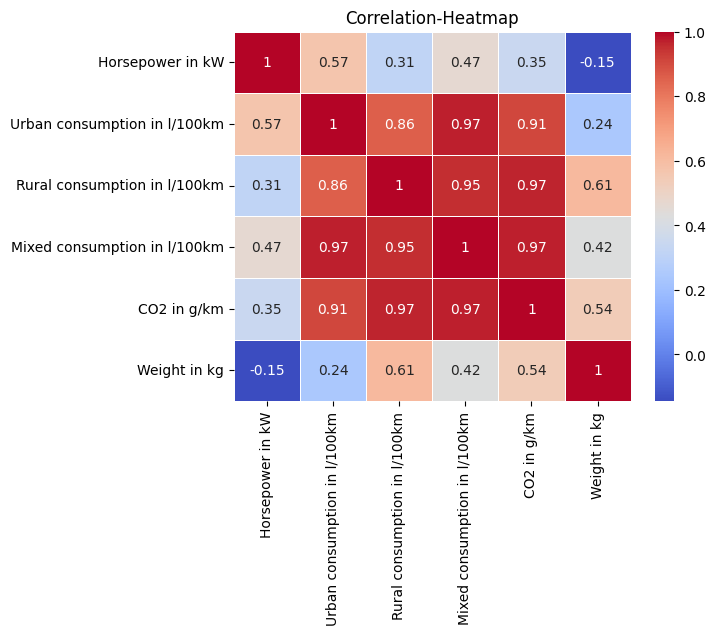

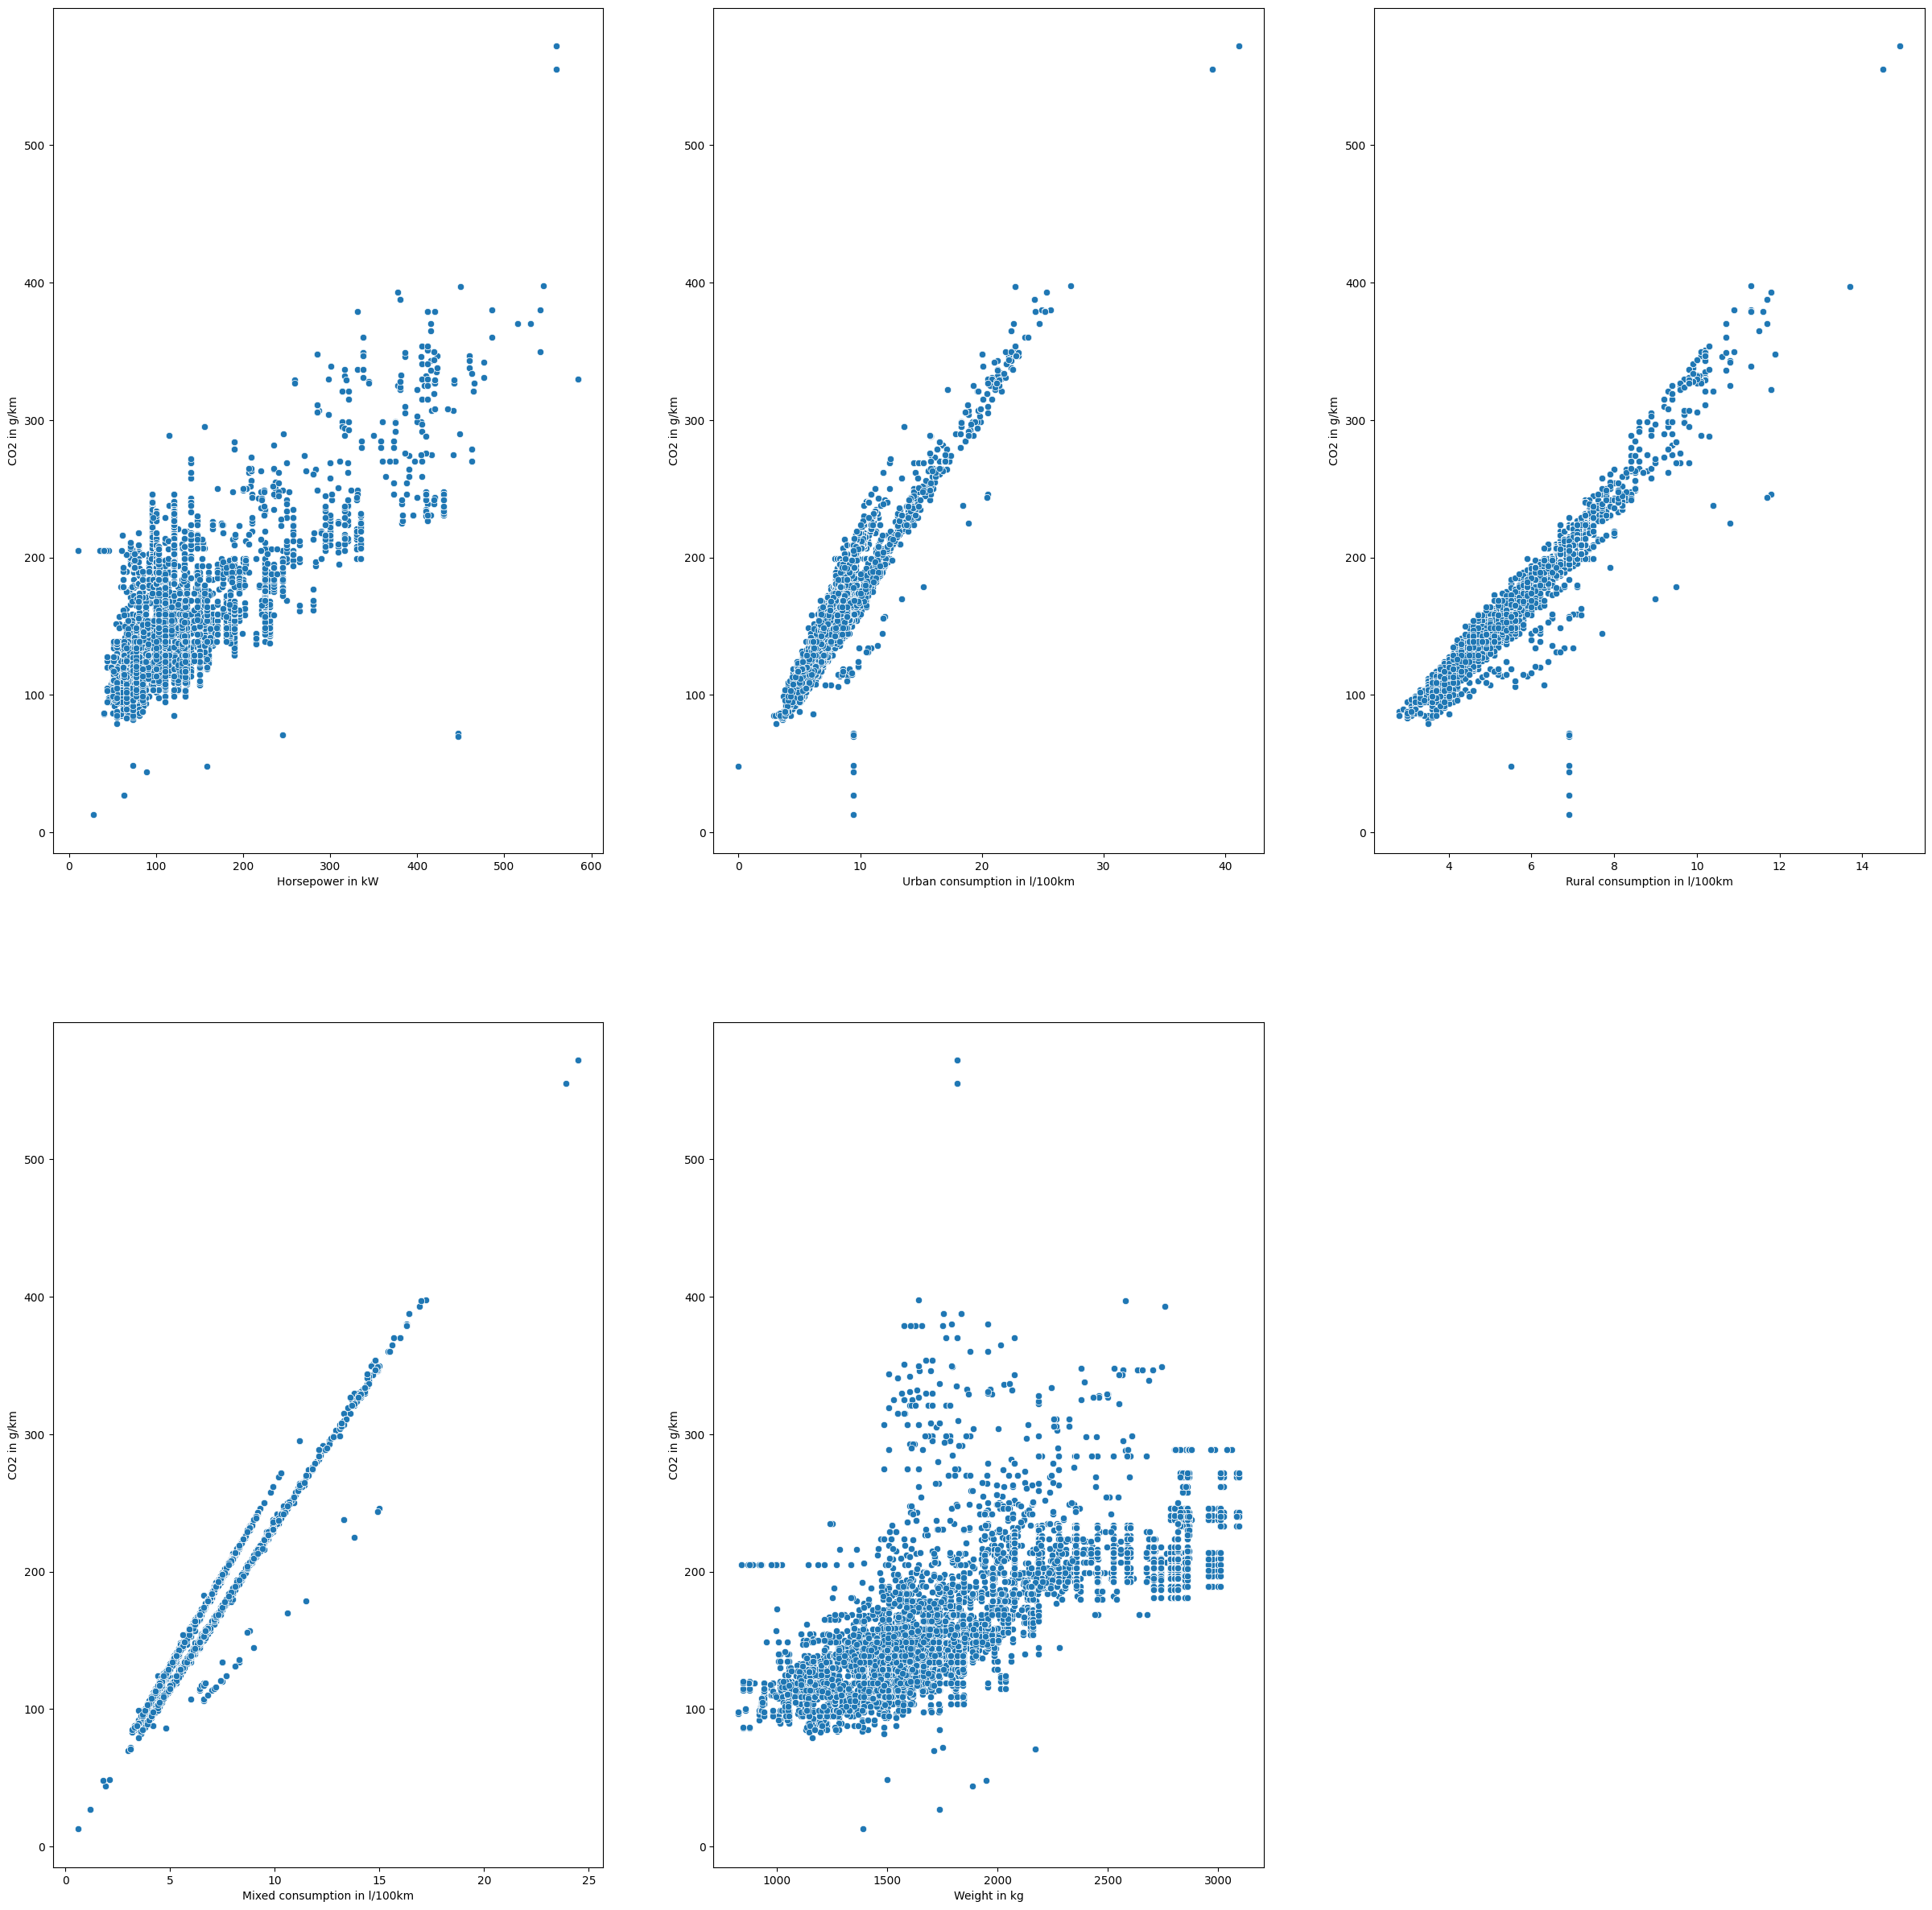

In [18]:
# select numeric columns for correlation
df_num = df.select_dtypes(include=[int, float])
df_num = df_num.drop('Year', axis=1)
cor = df_num.corr()

# display heatmap of correlation for the numeric columns
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation-Heatmap')
plt.show()

i = 1
plt.figure(figsize=(30,30))
for column in df_num:
    if (column != 'CO2 in g/km') & (column != 'Year'):
        plt.subplot(2,3,i)
        sns.scatterplot(x=column, y='CO2 in g/km', data=df_num)
        i += 1

In [19]:
# import the dataframe for FRANCE 2015
df = pd.read_csv('/kaggle/input/co2-emissions/CO data 12-15 original/fic_etiq_edition_40-mars-2015.csv', encoding='latin1', sep=';', engine="python")

# Understanding the structure of the dataset
df.head()

lib_mrq_doss lib_mod_doss     mrq_utac mod_utac                      dscom  \
0  ALFA ROMEO          159   ALFA ROMEO      159       159 1750 Tbi (200ch)    
1  ALFA ROMEO          159   ALFA ROMEO      159   159 2.0 JTDm (170ch) ECO    
2  ALFA ROMEO          159   ALFA ROMEO      159       159 2.0 JTDm (136ch)    
3  ALFA ROMEO          159   ALFA ROMEO      159       159 2.0 JTDm (136ch)    
4  ALFA ROMEO          159   ALFA ROMEO      159       159 2.0 JTDm (170ch)    

               cnit           tvv energ hybride  puiss_admin  ...  co2_mixte  \
0  M10ALFVP000G340   939AXN1B52C    ES     non            12  ...      182.0   
1  M10ALFVP000U221   939AXP1B54C    GO     non             9  ...      136.0   
2  M10ALFVP000E302    939AXR1B64    GO     non             7  ...      134.0   
3  M10ALFVP000F303   939AXR1B64B    GO     non             7  ...      134.0   
4  M10ALFVP000G304    939AXS1B66    GO     non             9  ...      139.0   

   co_typ_1     hc    nox  hcnox   ptcl  masse_ordma_min  masse_ordma_max  \
0     0.647  0.052  0.032    NaN  0.002             1505             1505   
1     0.192    NaN  0.169  0.190  0.003             1565             1565   
2     0.066    NaN  0.149  0.175  0.001             1565             1565   
3     0.066    NaN  0.149  0.175  0.001             1565             1565   
4     0.060    NaN  0.164  0.193  0.001             1565             1565   

                  champ_v9  date_maj  
0  715/2007*692/2008EURO5    juin-14  
1  715/2007*692/2008EURO5    juin-14  
2  715/2007*692/2008EURO5    juin-14  
3  715/2007*692/2008EURO5    juin-14  
4  715/2007*692/2008EURO5    juin-14  

[5 rows x 26 columns]

In [20]:
# cleaning the dataframe
# drop and rename columns
df = df.drop(columns=['lib_mrq_doss', 'lib_mod_doss', 'mrq_utac', 'mod_utac', 'dscom', 'cnit', 'tvv', 'energ', 'hybride', 'puiss_admin_98', 'masse_ordma_min', 'typ_boite_nb_rapp', 'co_typ_1', 'hc', 'nox', 'hcnox', 'ptcl', 'champ_v9', 'date_maj', 'Carrosserie', 'gamme', 'puiss_admin', 'puiss_heure'], errors='ignore')
df = df.rename(columns={'puiss_max': 'Horsepower in kW', 'co2_mixte': 'CO2 in g/km', 'conso_urb_93': 'Urban consumption in l/100km', 'conso_exurb': 'Rural consumption in l/100km', 'conso_mixte': 'Mixed consumption in l/100km', 'masse_ordma_max': 'Weight in kg'})
df['Year'] = 2015
df.head()

Horsepower in kW  Urban consumption in l/100km  \
0             147.0                          11.3   
1             125.0                           6.6   
2             100.0                           6.6   
3             100.0                           6.6   
4             125.0                           6.9   

   Rural consumption in l/100km  Mixed consumption in l/100km  CO2 in g/km  \
0                           5.8                           7.8        182.0   
1                           4.3                           5.1        136.0   
2                           4.2                           5.1        134.0   
3                           4.2                           5.1        134.0   
4                           4.3                           5.3        139.0   

   Weight in kg  Year  
0          1505  2015  
1          1565  2015  
2          1565  2015  
3          1565  2015  
4          1565  2015

In [21]:
print(df.info())
print(df.describe())
print(df.isna().sum())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20880 entries, 0 to 20879
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Horsepower in kW              20824 non-null  float64
 1   Urban consumption in l/100km  20759 non-null  float64
 2   Rural consumption in l/100km  20759 non-null  float64
 3   Mixed consumption in l/100km  20824 non-null  float64
 4   CO2 in g/km                   20824 non-null  float64
 5   Weight in kg                  20880 non-null  int64  
 6   Year                          20880 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.1 MB
None
       Horsepower in kW  Urban consumption in l/100km  \
count      20824.000000                  20759.000000   
mean         146.085315                      7.743307   
std           80.113755                      2.957154   
min           28.000000                      0.000000   
25%          100.0000

In [22]:
# fill in missing values
df['Horsepower in kW'] = df['Horsepower in kW'].fillna(df['Horsepower in kW'].median())
df['Urban consumption in l/100km'] = df['Urban consumption in l/100km'].fillna(df['Urban consumption in l/100km'].median())
df['Rural consumption in l/100km'] = df['Rural consumption in l/100km'].fillna(df['Rural consumption in l/100km'].median())
df['Mixed consumption in l/100km'] = df['Mixed consumption in l/100km'].fillna(df['Mixed consumption in l/100km'].median())
df['CO2 in g/km'] = df['CO2 in g/km'].fillna(df['CO2 in g/km'].median())

In [23]:
# Save DataFrame to a CSV file
df.to_csv('/kaggle/working/clean_data_France_2015.csv', index=False)

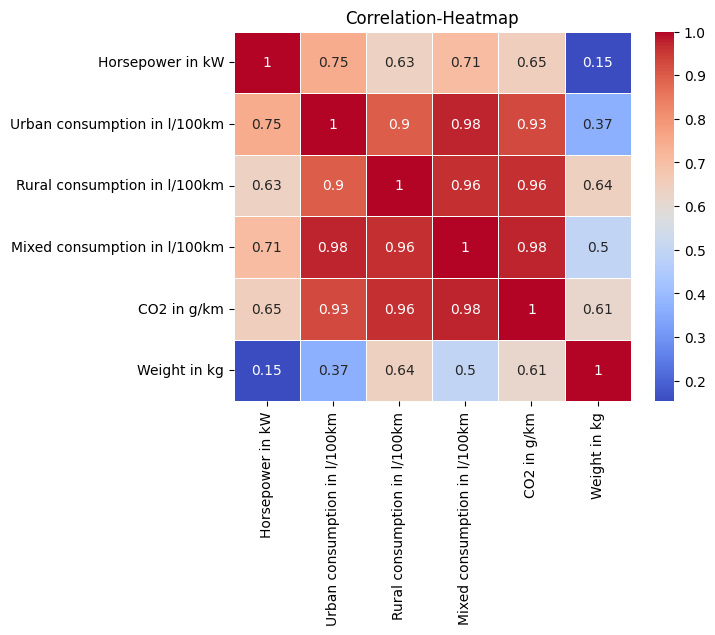

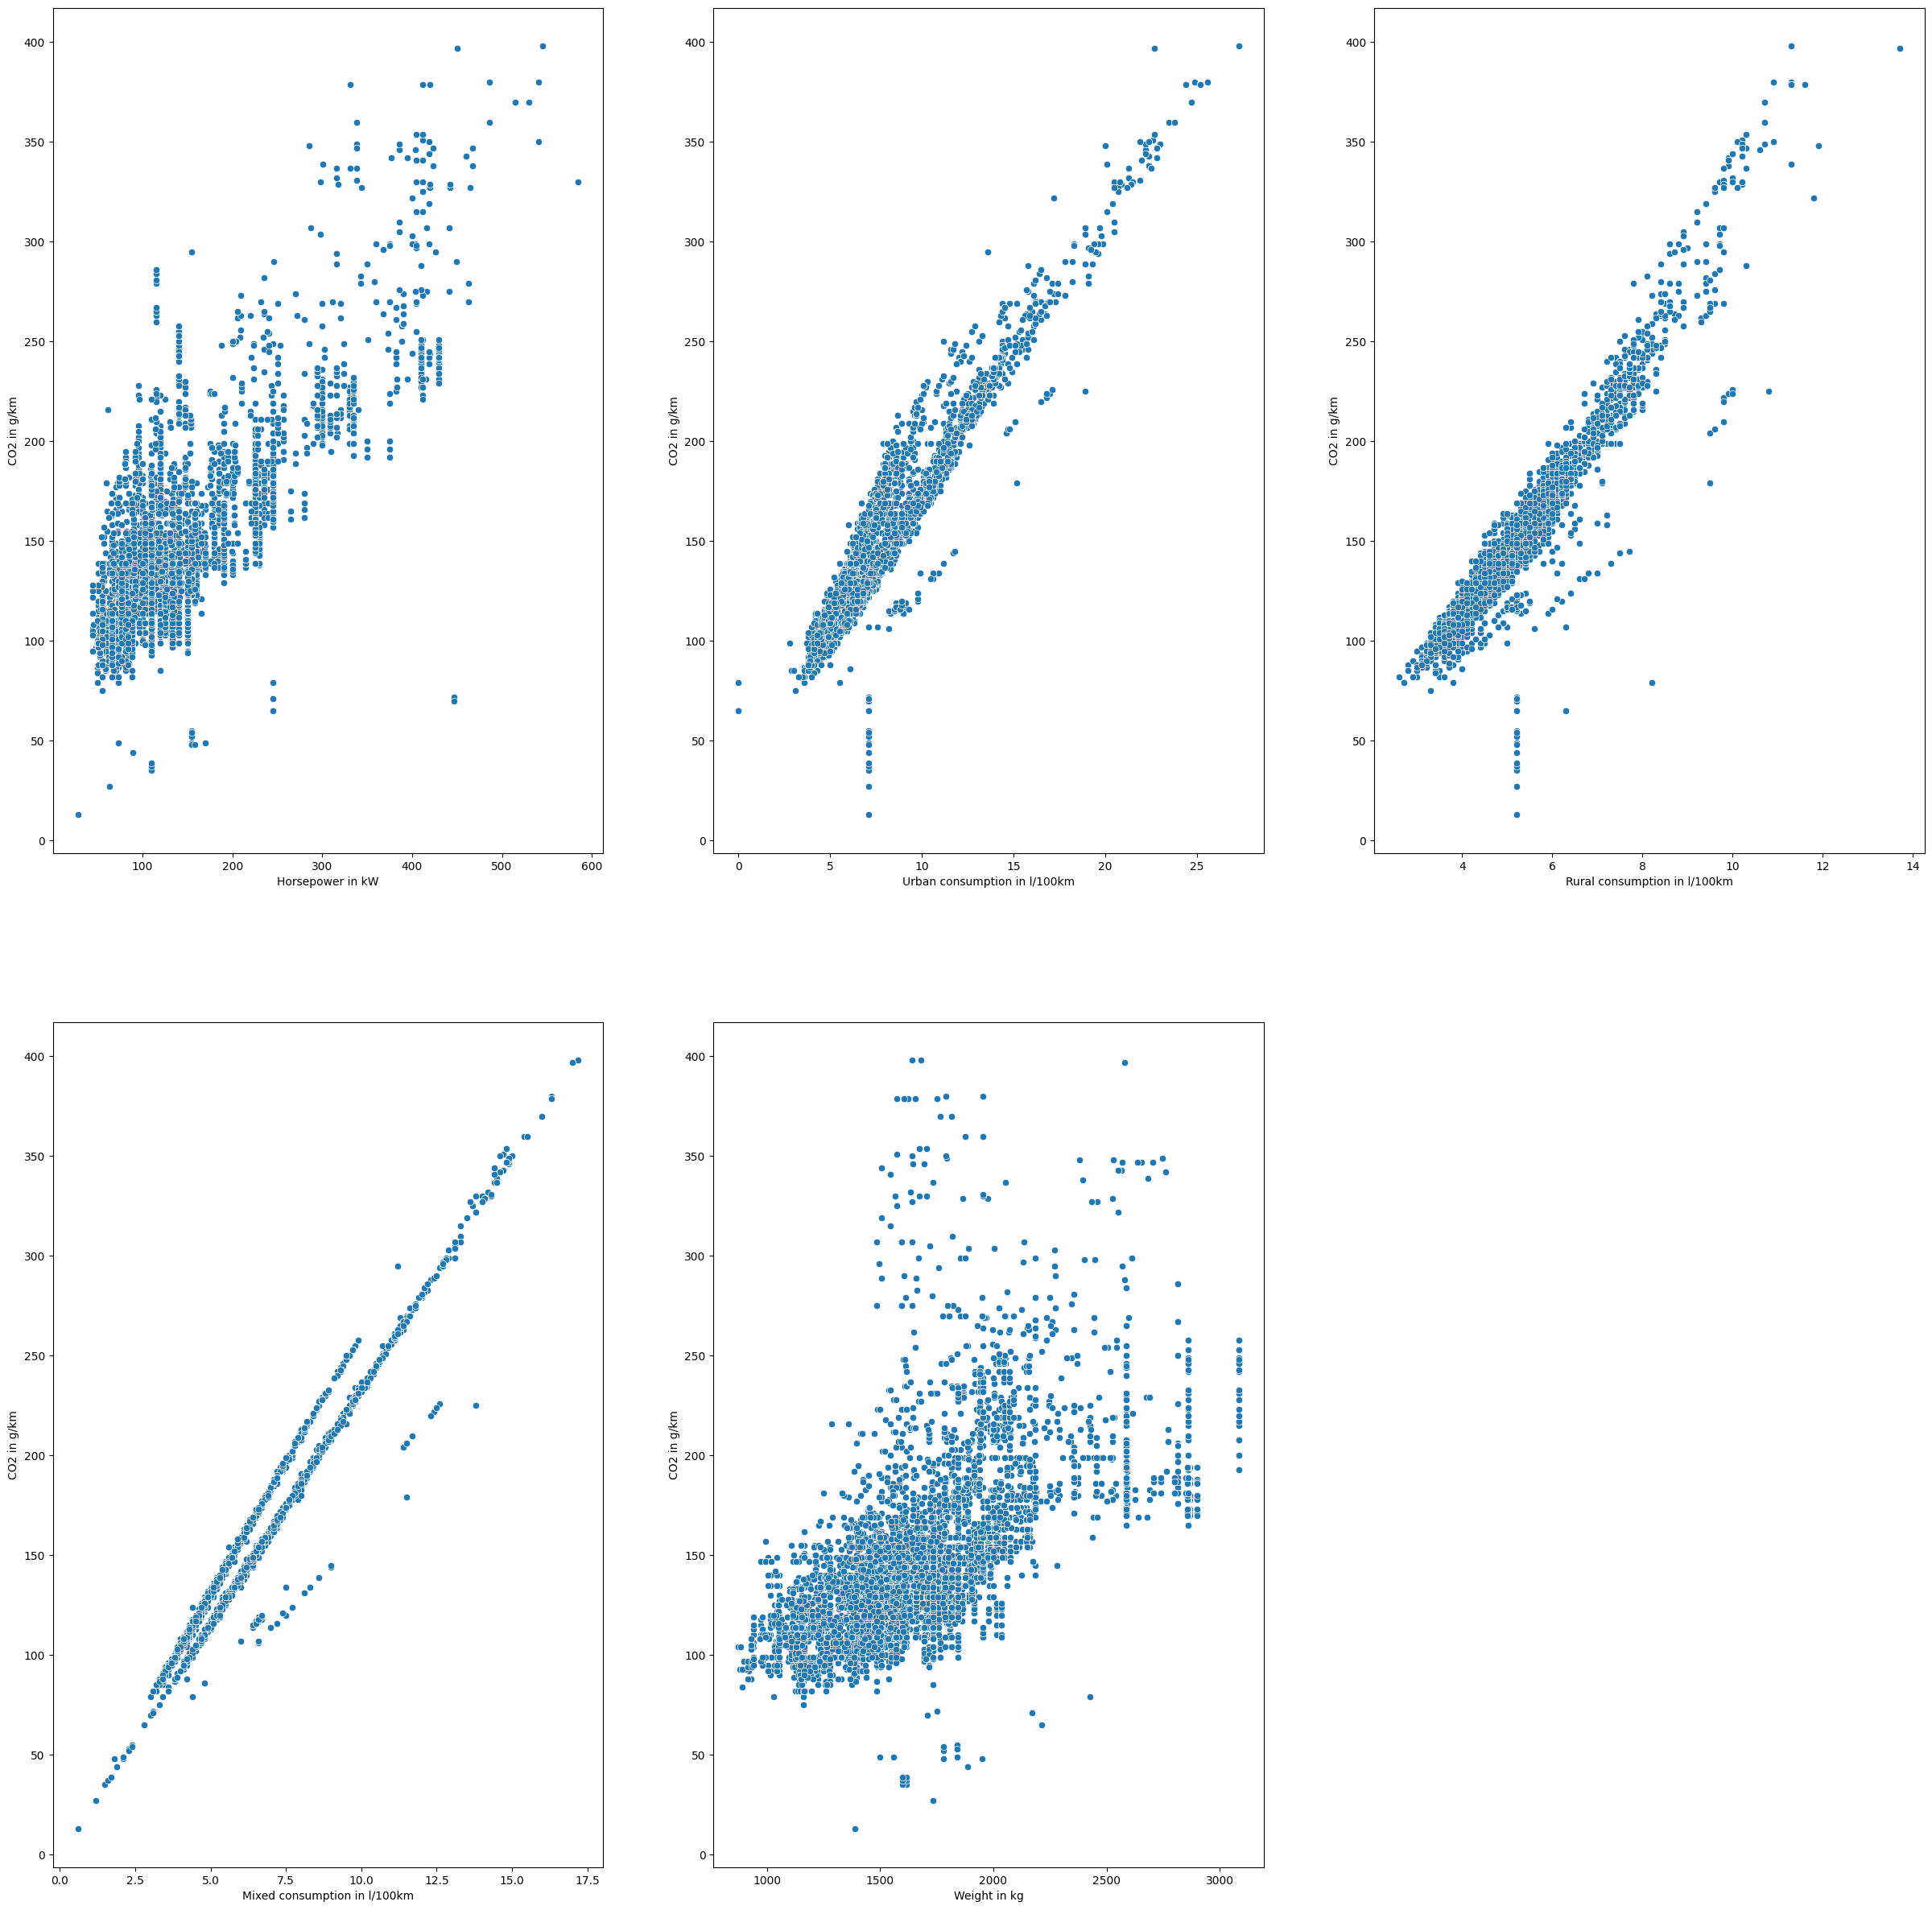

In [24]:
# select numeric columns for correlation
df_num = df.select_dtypes(include=[int, float])
df_num = df_num.drop('Year', axis=1)
cor = df_num.corr()

# display heatmap of correlation for the numeric columns
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation-Heatmap')
plt.show()

i = 1
plt.figure(figsize=(30,30))
for column in df_num:
    if (column != 'CO2 in g/km') & (column != 'Year'):
        plt.subplot(2,3,i)
        sns.scatterplot(x=column, y='CO2 in g/km', data=df_num)
        i += 1


---



### Here are the 4 European datasets - unfortunately, they have fewer relevant variables, only CO2 in g/km, weight of the car, and horsepower.

In [25]:
# import the dataframe for EU 2012
df_EU_12 = pd.read_csv('/kaggle/input/co2-emissions/CO data 12-15 original/CO2_passenger_cars_v6_2012.csv', sep='\t')

# Understanding the structure of the dataset
df_EU_12.head()

id  MS      Mh     MAN     MMS         TAN       T   Va   Ve          Mk  \
0   1  AT  AA-IVA  AA-IVA  ANDERE  11997/2012  CH6391  NaN  NaN     CHANGHE   
1   2  AT  AA-IVA  AA-IVA  ANDERE  14293/2012    RIOT  NaN  NaN       SYLVA   
2   3  AT  AA-IVA  AA-IVA  ANDERE  20346/2011     CEO  NaN  NaN  SHUANGHUAN   
3   4  AT  AA-IVA  AA-IVA    AUDI  11225/2012      B8  NaN  NaN        AUDI   
4   5  AT  AA-IVA  AA-IVA    AUDI  19586/2012      4G  NaN  NaN        AUDI   

   ... at1 (mm) at2 (mm)        Ft  Fm  ec (cm3)  ep (KW)  z (Wh/km)   IT  \
0  ...   1325.0   1305.0  Electric   M       NaN     20.0        NaN  NaN   
1  ...   1320.0   1375.0    Petrol   M    1340.0    145.0        NaN  NaN   
2  ...   1535.0   1535.0    Petrol   M    2351.0     92.0        NaN  NaN   
3  ...   1566.0   1566.0    Petrol   M    4163.0    331.0        NaN  NaN   
4  ...   1662.0   1663.0    Petrol   M    3993.0    412.0        NaN  NaN   

  Er (g/km)   MP  
0       NaN  NaN  
1       NaN  NaN  
2       NaN  NaN  
3       NaN  NaN  
4       NaN  NaN  

[5 rows x 26 columns]

### -> not ordered according to country and no data on fuel consumption/100km



In [26]:
# cleaning the dataframe
# drop and rename columns
df_EU_12 = df_EU_12.drop(columns=['id', 'MS', 'Mh', 'MAN', 'MMS', 'TAN', 'T', 'Va', 'Ve', 'Mk', 'Ft', 'Fm', '(Wh/km)', 'IT', 'Er (g/km)', 'MP', 'Cn', 'Ct', 'r', 'ec (cm3)', 'z (Wh/km)', 'w (mm)', 'at1 (mm)', 'at2 (mm)'], errors='ignore')
df_EU_12 = df_EU_12.rename(columns={'ep (KW)': 'Horsepower in kW', 'e (g/km)': 'CO2 in g/km', 'm (kg)': 'Weight in kg'})

# Drop rows in the specified ranges using list comprehension
df_EU_12 = df_EU_12.drop(index=[idx for idx in range(699, 7024)] + [idx for idx in range(7268, 7330)], errors='ignore')

# Add the 'Year' column
df_EU_12['Year'] = 2012

# check
df_EU_12.head()

CO2 in g/km  Weight in kg  Horsepower in kW  Year
0          0.0        1515.0              20.0  2012
1        183.0         575.0             145.0  2012
2        270.0        1795.0              92.0  2012
3        312.0        2000.0             331.0  2012
4        229.0        1870.0             412.0  2012

In [27]:
print(df_EU_12.info())
print(df_EU_12.describe())
print(df_EU_12.isna().sum())
print(df_EU_12.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 369028 entries, 0 to 375414
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CO2 in g/km       367393 non-null  float64
 1   Weight in kg      368417 non-null  float64
 2   Horsepower in kW  276191 non-null  float64
 3   Year              369028 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 14.1 MB
None
         CO2 in g/km   Weight in kg  Horsepower in kW      Year
count  367393.000000  368417.000000     276191.000000  369028.0
mean      150.577651    1565.076348        115.208613    2012.0
std        40.575753     326.586213         59.316170       0.0
min         0.000000     360.000000          0.000000    2012.0
25%       124.000000    1355.000000         77.000000    2012.0
50%       143.000000    1544.000000        103.000000    2012.0
75%       168.000000    1733.000000        130.000000    2012.0
max       980.000000    6500.000000    

In [28]:
df_EU_12.dropna(inplace=True) 
df_EU_12.shape

(275083, 4)

In [29]:
# Save DataFrame to a CSV file
df.to_csv('/kaggle/working/clean_data_EU_2012.csv', index=False)

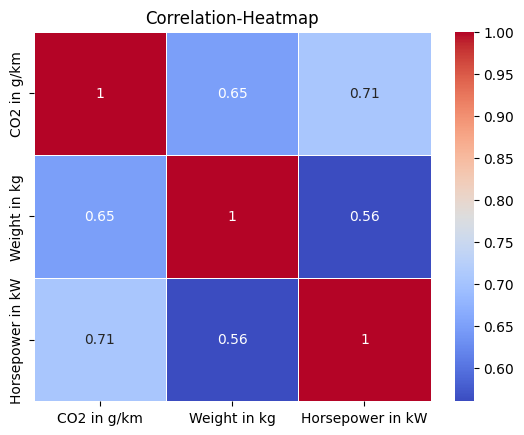

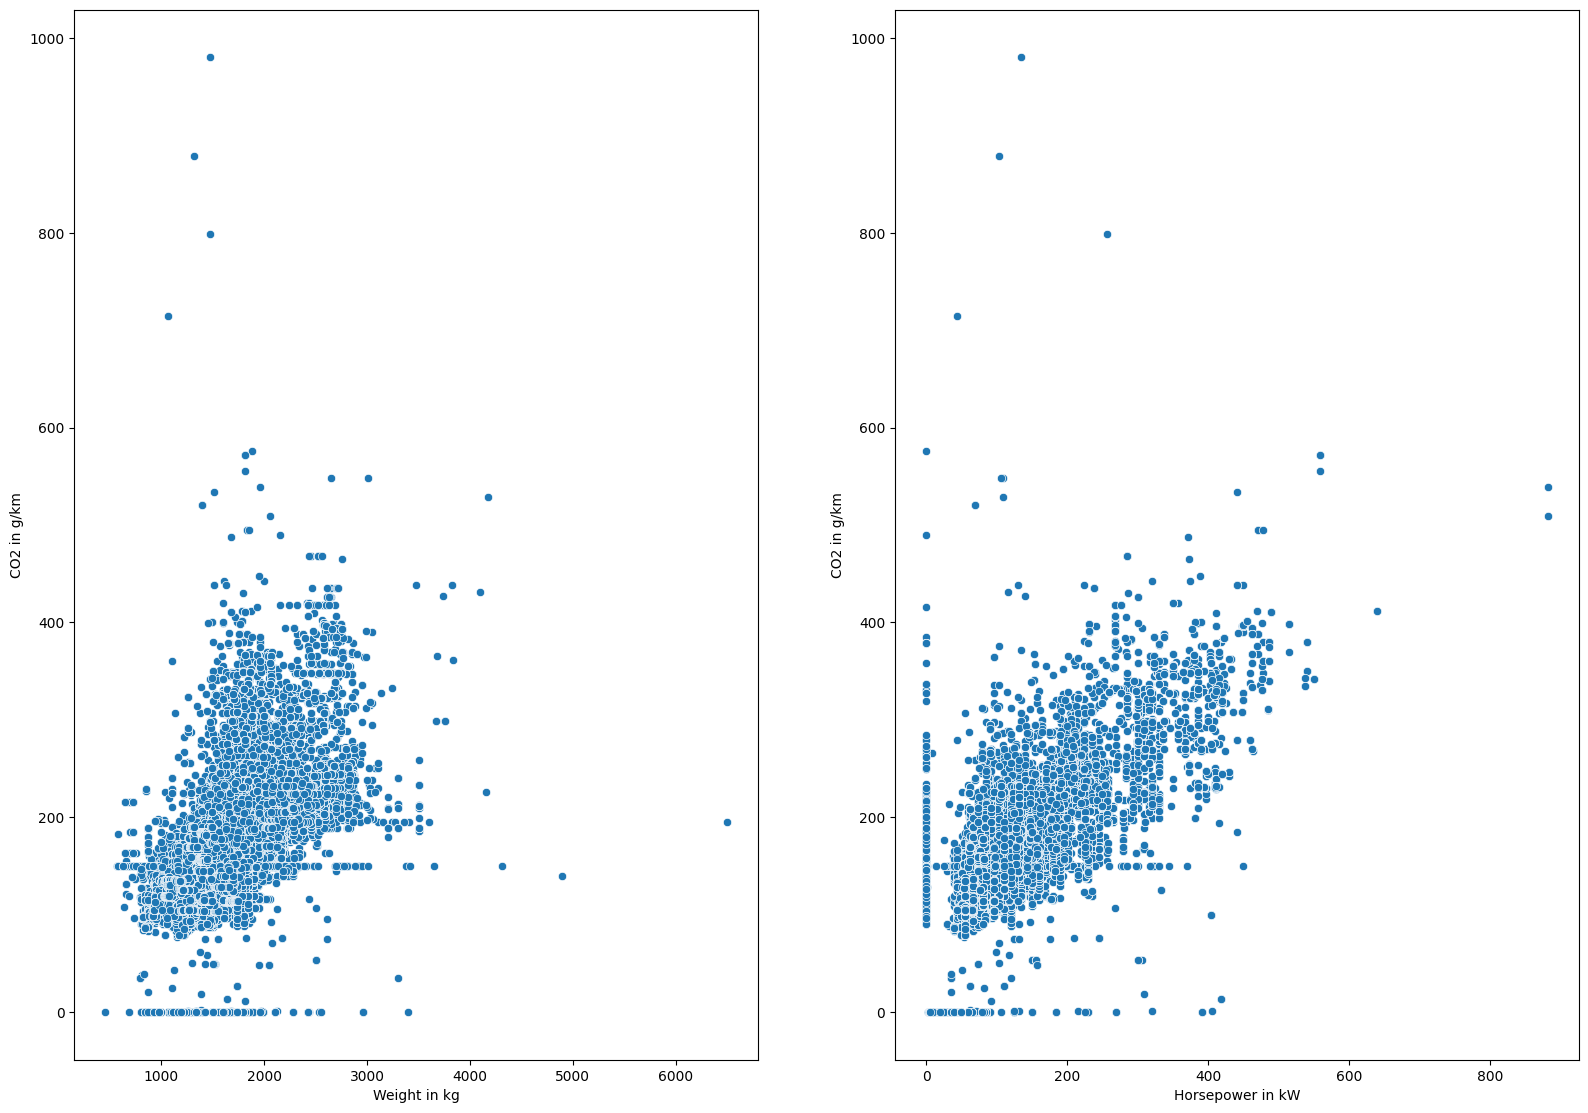

In [30]:
# select numeric columns for correlation
df_EU_12_num = df_EU_12.select_dtypes(include=[int, float])
df_EU_12_num = df_EU_12_num.drop('Year', axis=1)
cor = df_EU_12_num.corr()

# display heatmap of correlation for the numeric columns
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation-Heatmap')
plt.show()

i = 1
plt.figure(figsize=(30,30))
for column in df_EU_12_num:
    if (column != 'CO2 in g/km') & (column != 'Year'):
        plt.subplot(2,3,i)
        sns.scatterplot(x=column, y='CO2 in g/km', data=df_EU_12_num)
        i += 1

In [31]:
# import the dataframe for EU 2013
df_EU_13 = pd.read_csv('/kaggle/input/co2-emissions/CO data 12-15 original/CO2_passenger_cars_v8_2013.csv', sep='\t')

# Understanding the structure of the dataset
df_EU_13.head()

id  MS   MP      Mh     MAN   MMS         TAN   T       Va  \
0   1  AT  NaN  AA-IVA  AA-IVA  AUDI  19469/2013  4H      NaN   
1   2  AT  NaN  AA-IVA  AA-IVA  AUDI  12364/2013  4H      NaN   
2   3  AT  NaN  AA-IVA  AA-IVA  AUDI  16748/2013  4H  GCTGAQ1   
3   4  AT  NaN  AA-IVA  AA-IVA  AUDI  16699/2013  8P  SCAYCF1   
4   5  AT  NaN  AA-IVA  AA-IVA  AUDI  15662/2013  8V      NaN   

                        Ve  ...  w (mm) at1 (mm) at2 (mm)      Ft  Fm  \
0                      NaN  ...  3122.0   1652.0   1643.0  Petrol   M   
1                      NaN  ...  3122.0   1652.0   1643.0  Petrol   M   
2  QA8BK001R4HK1S4+17MMEM2  ...  3100.0   1652.0   1643.0  Petrol   M   
3      FM5A4051R8P607MGEM1  ...  2578.0   1522.0   1515.0  Diesel   M   
4                      NaN  ...  2618.0   1555.0   1526.0  Petrol   M   

   ec (cm3)  ep (KW)  z (Wh/km)   IT Er (g/km)  
0    3993.0    412.0        NaN  NaN       NaN  
1    6299.0    368.0        NaN  NaN       NaN  
2    3993.0    320.0        NaN  NaN       NaN  
3    1598.0     77.0        NaN  NaN       NaN  
4    1798.0    132.0        NaN  NaN       NaN  

[5 rows x 26 columns]

In [32]:
# cleaning the dataframe
# drop and rename columns
df_EU_13 = df_EU_13.drop(columns=['id', 'MS', 'Mh', 'MAN', 'MMS', 'TAN', 'T', 'Va', 'Ve', 'Mk', 'Ft', 'Fm', '(Wh/km)', 'IT', 'Er (g/km)', 'MP', 'Cn', 'Ct', 'r', 'ec (cm3)', 'z (Wh/km)', 'w (mm)', 'at1 (mm)', 'at2 (mm)'], errors='ignore')
df_EU_13 = df_EU_13.rename(columns={'ep (KW)': 'Horsepower in kW', 'e (g/km)': 'CO2 in g/km', 'm (kg)': 'Weight in kg'})

# Add the 'Year' column
df_EU_13['Year'] = 2013

# check
df_EU_13.head()

CO2 in g/km  Weight in kg  Horsepower in kW  Year
0          NaN        2260.0             412.0  2013
1        277.0        2130.0             368.0  2013
2        216.0        2020.0             320.0  2013
3        112.0        1395.0              77.0  2013
4        152.0        1470.0             132.0  2013

In [33]:
print(df_EU_13.info())
print(df_EU_13.describe())
print(df_EU_13.isna().sum())
print(df_EU_13.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442475 entries, 0 to 442474
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CO2 in g/km       441143 non-null  float64
 1   Weight in kg      441392 non-null  float64
 2   Horsepower in kW  363957 non-null  float64
 3   Year              442475 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 13.5 MB
None
         CO2 in g/km   Weight in kg  Horsepower in kW      Year
count  441143.000000  441392.000000     363957.000000  442475.0
mean      142.942638    1527.132805        111.139339    2013.0
std        38.329576     322.052934         57.612523       0.0
min         0.000000     316.000000          5.000000    2013.0
25%       119.000000    1298.000000         77.000000    2013.0
50%       136.000000    1503.000000         99.000000    2013.0
75%       158.000000    1700.000000        125.000000    2013.0
max       596.000000    5540.00000

In [34]:
df_EU_13.dropna(inplace=True) 
df_EU_13.shape

(363134, 4)

In [35]:
# Save DataFrame to a CSV file
df.to_csv('/kaggle/working/clean_data_EU_2013.csv', index=False)

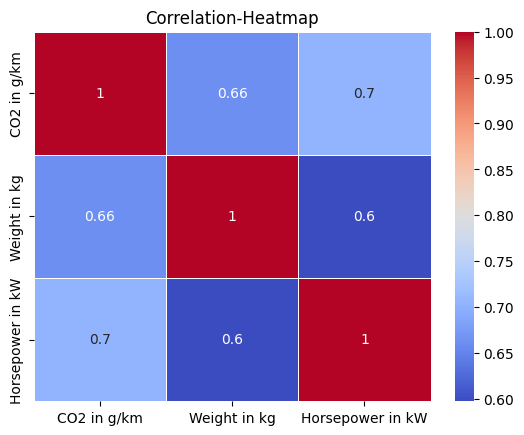

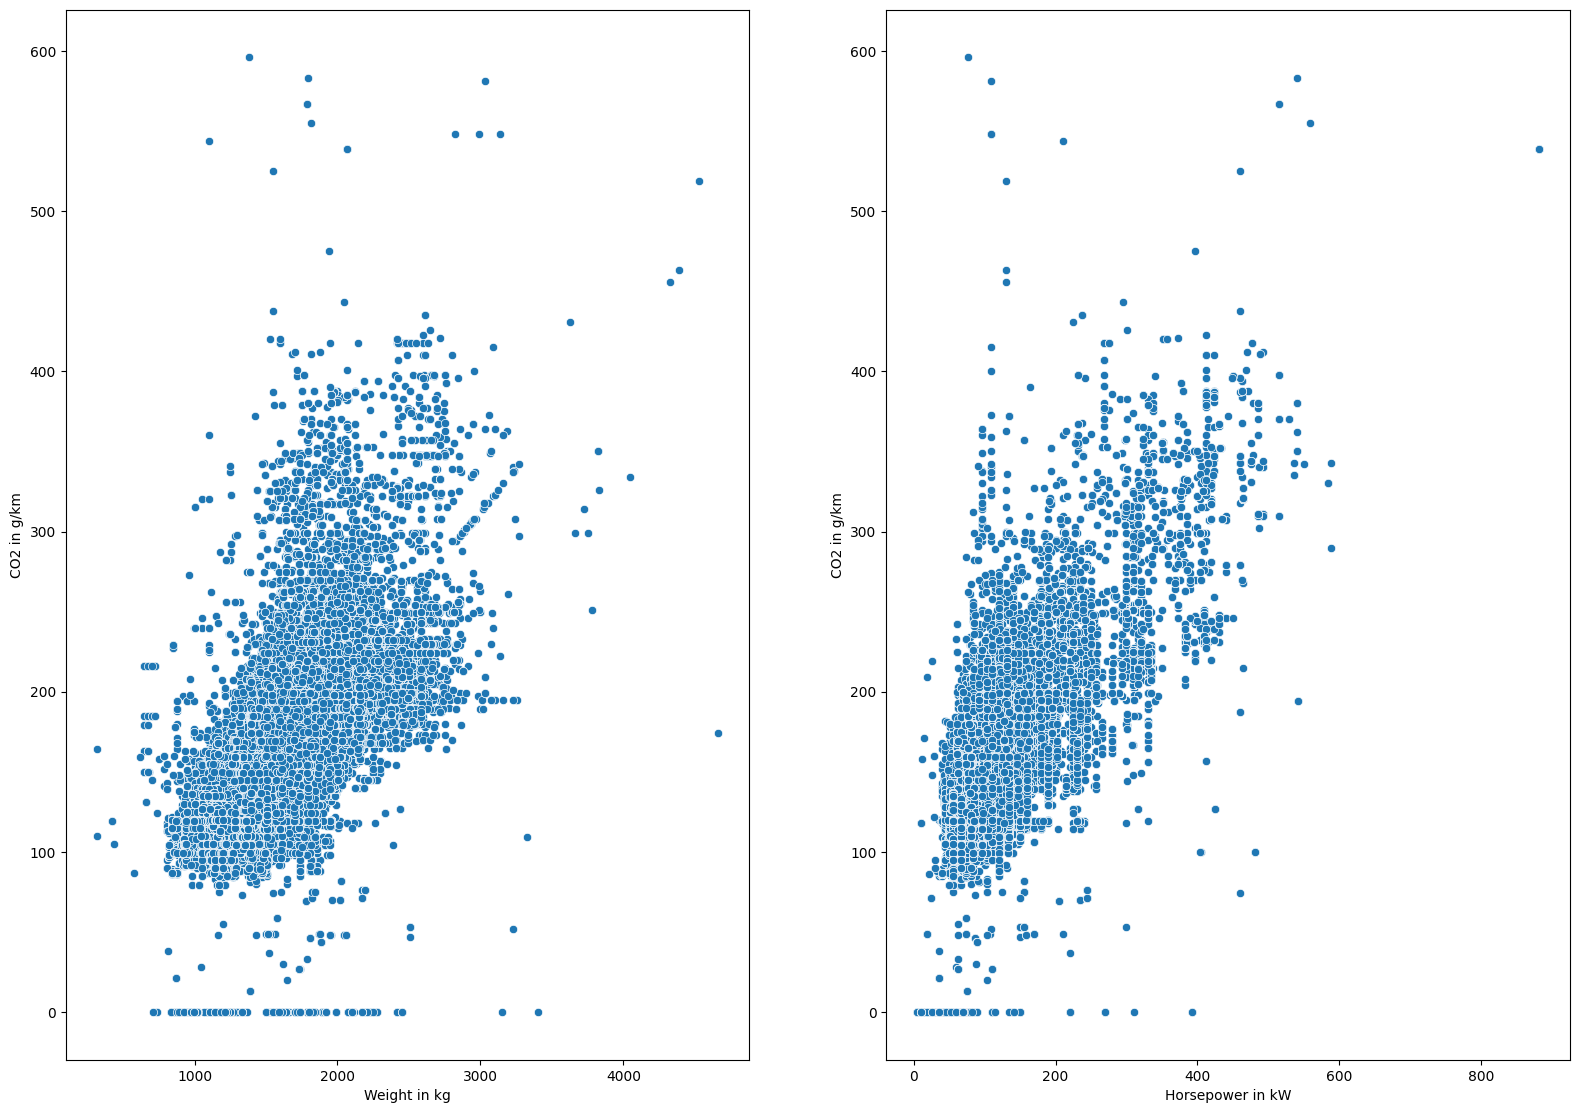

In [36]:
# select numeric columns for correlation
df_EU_13_num = df_EU_13.select_dtypes(include=[int, float])
df_EU_13_num = df_EU_13_num.drop('Year', axis=1)
cor = df_EU_13_num.corr()

# display heatmap of correlation for the numeric columns
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation-Heatmap')
plt.show()

i = 1
plt.figure(figsize=(30,30))
for column in df_EU_13_num:
    if (column != 'CO2 in g/km') & (column != 'Year'):
        plt.subplot(2,3,i)
        sns.scatterplot(x=column, y='CO2 in g/km', data=df_EU_13_num)
        i += 1

In [37]:
# import the dataframe for EU 2012
df_EU_14 = pd.read_csv('/kaggle/input/co2-emissions/CO data 12-15 original/CO2_passenger_cars_v10_2014.csv', sep='\t')

# Understanding the structure of the dataset
df_EU_14.head()

id  MS  MP      Mh     MAN           MMS         TAN    T      Va  \
0   1  AT  na  AA-IVA  AA-IVA  ADAM OPEL AG  27713/2014  K/R    ABAA   
1   2  AT  na  AA-IVA  AA-IVA       AUDI AG  12610/2014   4H     NaN   
2   3  AT  na  AA-IVA  AA-IVA       AUDI AG  11723/2014   4L  XBUGQ1   
3   4  AT  na  AA-IVA  AA-IVA       AUDI AG  14593/2014   8K     NaN   
4   5  AT  na  AA-IVA  AA-IVA       AUDI AG  11532/2014   8V     NaN   

                     Ve  ...  w (mm) at1 (mm) at2 (mm)      Ft  Fm  ec (cm3)  \
0             ABBAABBAA  ...  2415.0   1543.0   1561.0  Petrol   M    1998.0   
1                   NaN  ...  3122.0   1652.0   1643.0  Petrol   M    6299.0   
2  QA69D052R4L907GGS5FS  ...  3013.0   1653.0   1695.0  Diesel   M    2967.0   
3                   NaN  ...  2805.0   1583.0   1574.0  Petrol   M    1984.0   
4                   NaN  ...  2594.0   1555.0   1526.0  Petrol   M    1984.0   

   ep (KW)  z (Wh/km)   IT Er (g/km)  
0    194.0        NaN  NaN       NaN  
1    368.0        NaN  NaN       NaN  
2    171.0        NaN  NaN       NaN  
3    220.0        NaN  NaN       NaN  
4    221.0        NaN  NaN       NaN  

[5 rows x 26 columns]

In [38]:
# cleaning the dataframe
# drop and rename columns
df_EU_14 = df_EU_14.drop(columns=['id', 'MS', 'Mh', 'MAN', 'MMS', 'TAN', 'T', 'Va', 'Ve', 'Mk', 'Ft', 'Fm', '(Wh/km)', 'IT', 'Er (g/km)', 'MP', 'Cn', 'Ct', 'r', 'ec (cm3)', 'z (Wh/km)', 'w (mm)', 'at1 (mm)', 'at2 (mm)'], errors='ignore')
df_EU_14 = df_EU_14.rename(columns={'ep (KW)': 'Horsepower in kW', 'e (g/km)': 'CO2 in g/km', 'm (kg)': 'Weight in kg'})

# Add the 'Year' column
df_EU_14['Year'] = 2014

# check
df_EU_14.head()

CO2 in g/km  Weight in kg  Horsepower in kW  Year
0        218.0        1406.0             194.0  2014
1        264.0        2195.0             368.0  2014
2        282.0        2370.0             171.0  2014
3          NaN        1840.0             220.0  2014
4        165.0        1695.0             221.0  2014

In [39]:
print(df_EU_14.info())
print(df_EU_14.describe())
print(df_EU_14.isna().sum())
print(df_EU_14.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417939 entries, 0 to 417938
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CO2 in g/km       416896 non-null  float64
 1   Weight in kg      417647 non-null  float64
 2   Horsepower in kW  338040 non-null  float64
 3   Year              417939 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 12.8 MB
None
         CO2 in g/km   Weight in kg  Horsepower in kW      Year
count  416896.000000  417647.000000     338040.000000  417939.0
mean      139.484920    1535.525779        117.733200    2014.0
std        38.566611     322.474188         62.191607       0.0
min         0.000000     390.000000          0.000000    2014.0
25%       115.000000    1316.000000         80.000000    2014.0
50%       132.000000    1503.000000        103.000000    2014.0
75%       155.000000    1701.000000        133.000000    2014.0
max       598.000000    4670.00000

In [40]:
df_EU_14.dropna(inplace=True)
df_EU_14.shape

(337112, 4)

In [41]:
# Save DataFrame to a CSV file
df.to_csv('/kaggle/working/clean_data_EU_2014.csv', index=False)

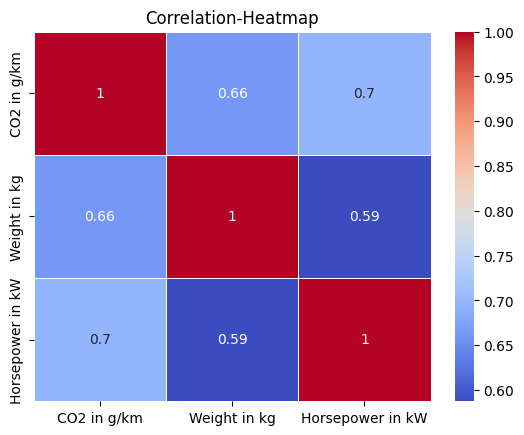

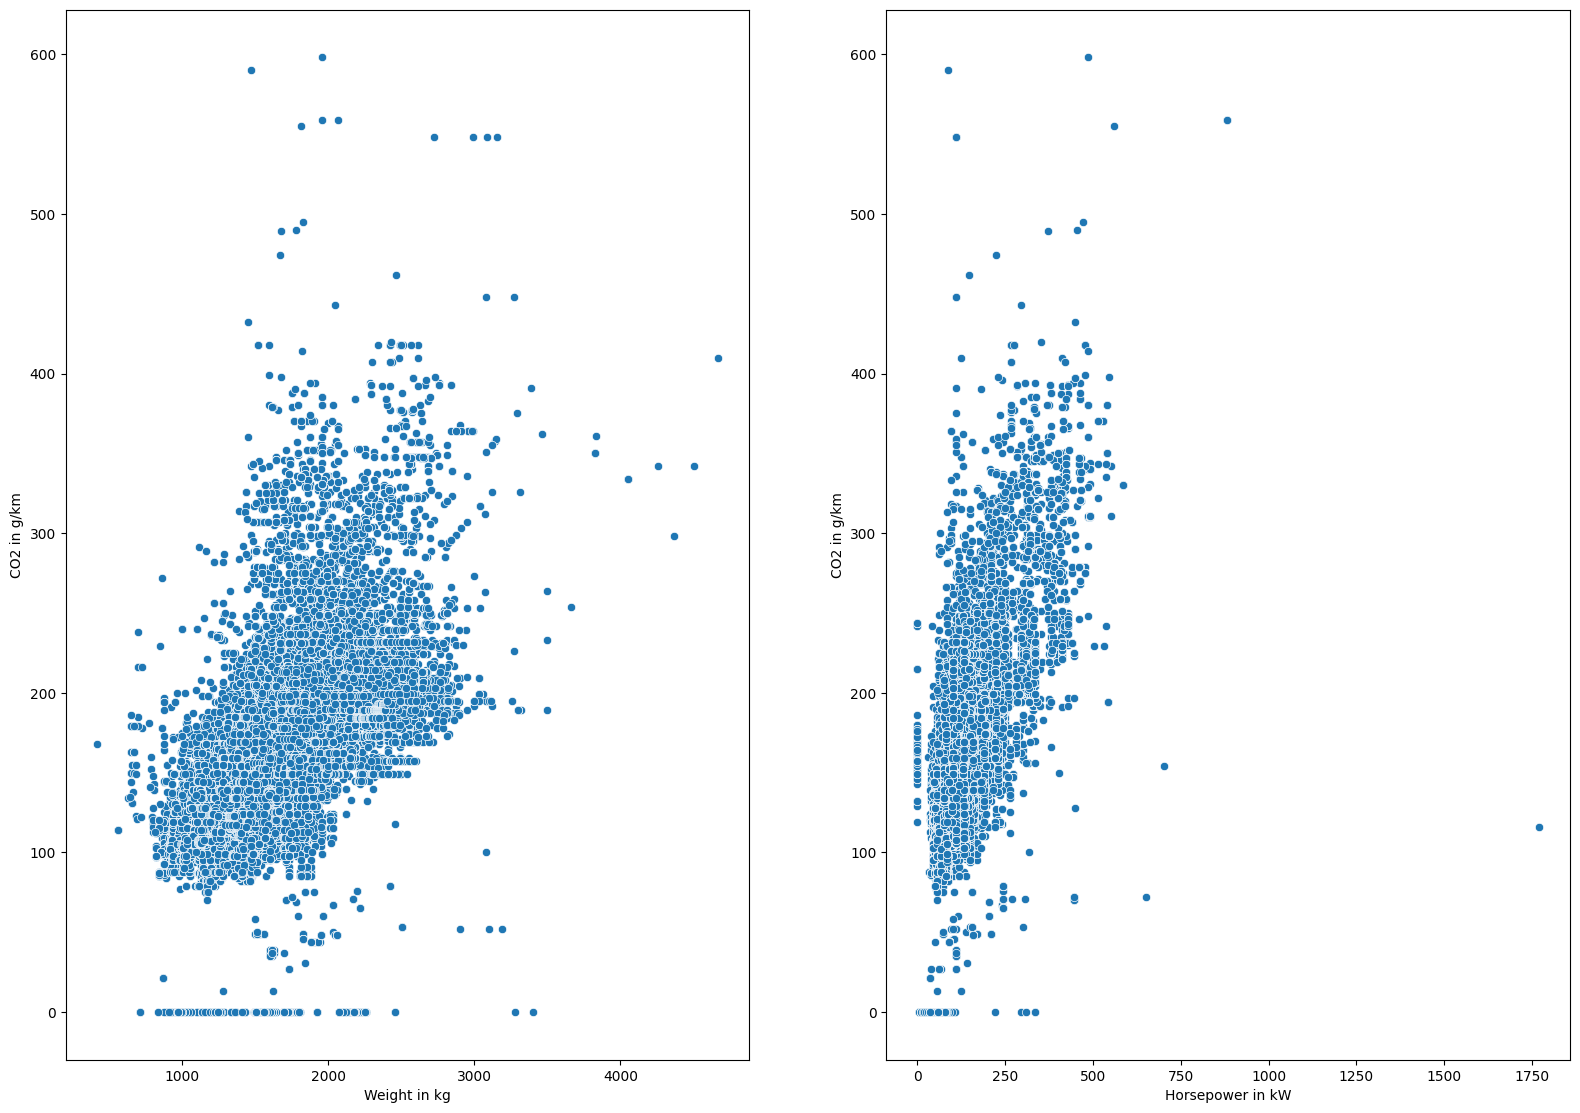

In [42]:
# select numeric columns for correlation
df_EU_14_num = df_EU_14.select_dtypes(include=[int, float])
df_EU_14_num = df_EU_14_num.drop('Year', axis=1)
cor = df_EU_14_num.corr()

# display heatmap of correlation for the numeric columns
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation-Heatmap')
plt.show()

i = 1
plt.figure(figsize=(30,30))
for column in df_EU_14_num:
    if (column != 'CO2 in g/km') & (column != 'Year'):
        plt.subplot(2,3,i)
        sns.scatterplot(x=column, y='CO2 in g/km', data=df_EU_14_num)
        i += 1

In [43]:
# import the dataframe for EU 2015
df_EU_15 = pd.read_csv('/kaggle/input/co2-emissions/CO data 12-15 original/CO2_passenger_cars_v12_2015.csv', encoding='latin1',sep='\t', engine="python")

# Understanding the structure of the dataset
df_EU_15.head()

ï»¿id  MS           MP          Mh            Man            MMS  \
0  346261  LU  VW GROUP PC  VOLKSWAGEN  VOLKSWAGEN AG  VOLKSWAGEN AG   
1  346262  LU  VW GROUP PC  VOLKSWAGEN  VOLKSWAGEN AG  VOLKSWAGEN AG   
2  346263  LU  VW GROUP PC  VOLKSWAGEN  VOLKSWAGEN AG  VOLKSWAGEN AG   
3  346264  LU  VW GROUP PC  VOLKSWAGEN  VOLKSWAGEN AG  VOLKSWAGEN AG   
4  346265  LU  VW GROUP PC  VOLKSWAGEN  VOLKSWAGEN AG  VOLKSWAGEN AG   

                   TAN     T          Va                         Ve  ...  \
0   E1*2007/46*0623*09    AU   AC4CRBCX0      FD6FD6D9004N7MJOMLVR2  ...   
1   E1*2007/46*0623*17    AU  GAC4CHHBX0  FD6FD6D9011S7MMON1ML71VR2  ...   
2  E1*2001/116*0356*17  2EC2   KN4D1350N                   MEC24VD9  ...   
3   E1*2007/46*0539*13    16    AECTHDX0       FD7FD7AM006N7MJVIVR0  ...   
4   E1*2007/46*0539*14    16    ABCFFBX0       FD6FD62E018N7MJVIVR0  ...   

   w (mm) at1 (mm) at2 (mm)      Ft  Fm  ec (cm3)  ep (KW)  z (Wh/km)   It  \
0  2620.0   1527.0   1496.0  DIESEL   M    1968.0    110.0        NaN  NaN   
1  2626.0   1527.0   1496.0  PETROL   M    1984.0    162.0        NaN  NaN   
2  3665.0   1710.0   1716.0  DIESEL   M    1968.0    120.0        NaN  NaN   
3  2538.0   1570.0   1548.0  PETROL   M    1390.0    118.0        NaN  NaN   
4  2524.0   1570.0   1546.0  DIESEL   M    1968.0    103.0        NaN  NaN   

  Er (g/km)  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 26 columns]

In [44]:
# cleaning the dataframe
# drop and rename columns
df_EU_15 = df_EU_15.drop(columns=['ï»¿id', 'MS', 'Mh', 'Man', 'MMS', 'TAN', 'T', 'Va', 'Ve', 'Mk', 'Ft', 'Fm', '(Wh/km)', 'It', 'Er (g/km)', 'MP', 'Cn', 'Ct', 'r', 'ec (cm3)', 'z (Wh/km)', 'w (mm)', 'at1 (mm)', 'at2 (mm)'], errors='ignore')
df_EU_15 = df_EU_15.rename(columns={'ep (KW)': 'Horsepower in kW', 'e (g/km)': 'CO2 in g/km', 'm (kg)': 'Weight in kg'})

# Add the 'Year' column
df_EU_15['Year'] = 2015

# check
df_EU_15.head()

CO2 in g/km  Weight in kg  Horsepower in kW  Year
0        119.0        1376.0             110.0  2015
1        145.0        1392.0             162.0  2015
2        209.0        2356.0             120.0  2015
3        148.0        1468.0             118.0  2015
4        140.0        1411.0             103.0  2015

In [45]:
print(df_EU_15.info())
print(df_EU_15.describe())
print(df_EU_15.isna().sum())
print(df_EU_15.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440645 entries, 0 to 440644
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CO2 in g/km       439848 non-null  float64
 1   Weight in kg      440431 non-null  float64
 2   Horsepower in kW  365120 non-null  float64
 3   Year              440645 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 13.4 MB
None
         CO2 in g/km   Weight in kg  Horsepower in kW      Year
count  439848.000000  440431.000000     365120.000000  440645.0
mean      133.033309    1533.404422        116.845758    2015.0
std        36.247475     316.868260         59.442062       0.0
min         0.000000     430.000000         10.000000    2015.0
25%       110.000000    1320.000000         81.000000    2015.0
50%       125.000000    1495.000000        103.000000    2015.0
75%       149.000000    1700.000000        135.000000    2015.0
max       559.000000    6278.00000

In [46]:
df_EU_15.dropna(inplace=True)
df_EU_15.shape

(364422, 4)

In [47]:
# Save DataFrame to a CSV file
df.to_csv('/kaggle/working/clean_data_EU_2015.csv', index=False)

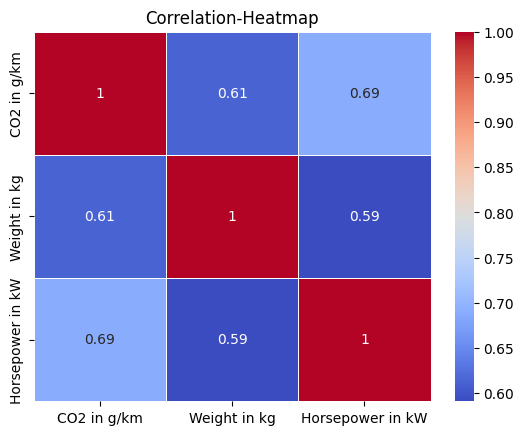

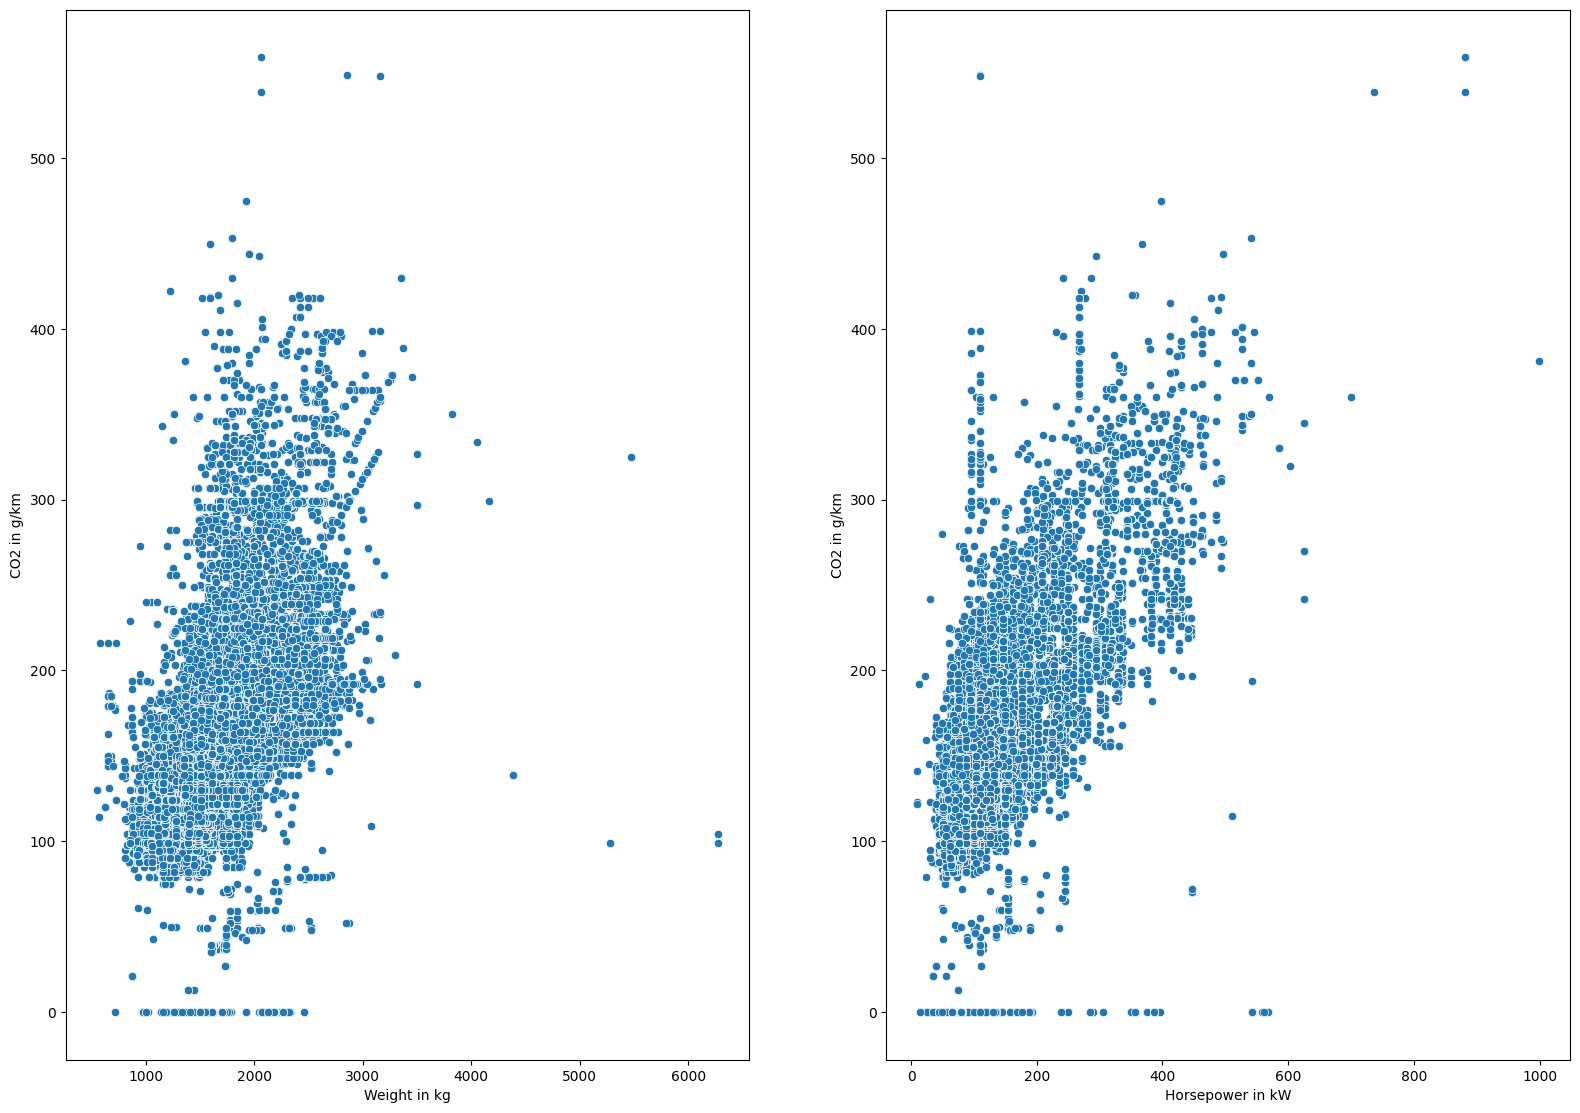

In [48]:
# select numeric columns for correlation
df_EU_15_num = df_EU_15.select_dtypes(include=[int, float])
df_EU_15_num = df_EU_15_num.drop('Year', axis=1)
cor = df_EU_15_num.corr()

# display heatmap of correlation for the numeric columns
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation-Heatmap')
plt.show()

i = 1
plt.figure(figsize=(30,30))
for column in df_EU_15_num:
    if (column != 'CO2 in g/km') & (column != 'Year'):
        plt.subplot(2,3,i)
        sns.scatterplot(x=column, y='CO2 in g/km', data=df_EU_15_num)
        i += 1

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths for France and Europe
france_file_paths = [f"/kaggle/input/co2-emissions/CO data 12-15 clean/clean_data_France_{year}.csv" for year in range(2012, 2016)]
europe_file_paths = [f"/kaggle/input/co2-emissions/CO data 12-15 clean/clean_data_EU_{year}.csv" for year in range(2012, 2016)]

# Load and concatenate datasets for France and Europe
dfs_fr = [pd.read_csv(file_path) for file_path in france_file_paths]
dfs_eu = [pd.read_csv(file_path) for file_path in europe_file_paths]

df_fr = pd.concat(dfs_fr)
df_eu = pd.concat(dfs_eu)

# Save DataFrames to a CSV file
df_fr.to_csv('/kaggle/working/df_fr.csv', index=False)
df_eu.to_csv('/kaggle/working/df_eu.csv', index=False)


df_fr['Location']='France'

df_eu['Location']='Europe'

df_combined=pd.concat([df_fr, df_eu], axis=0)
df_combined = df_combined.drop(['Urban consumption in l/100km', 	'Rural consumption in l/100km', 	'Mixed consumption in l/100km'], axis=1)
df_combined

# Save DataFrame to a CSV file
df_combined.to_csv('/kaggle/working/df_combined.csv', index=False)

In [50]:
df_combined.head()

Horsepower in kW  CO2 in g/km  Weight in kg  Year Location
0              85.0        149.0        1355.0  2012   France
1              62.0         98.0        1205.0  2012   France
2              85.0        149.0        1355.0  2012   France
3              77.0        136.0        1185.0  2012   France
4             120.0        134.0        1365.0  2012   France